## Introduction 

The goal of this notebook is to generate graphs and plots for analysis and insights

<a id="toc"></a>
### Table of Contents

1. [Introduction](#intro)
2. [Setup](#setup)
3. [Importing Data](#import)
4. [Plotting Function](#plotfunc)
5. [Groups](#groups)
6. [Outliers](#outliers)
7. [EDA](#eda)
8. [Continuous - KDE Plots](#contkde)
9. [Continous - Stay Length](#contstay)
10. [Continous - Visits P3Y](#contp3y)
11. [Categorical - Bar Plots](#catbar)
12. [Total Expense by Categories](#cattotalexp)
13. [Non Medical Expenses by Categories](#catnonmed)
14. [Stay Length by Categories](#catstay)
15. [POV Group Indepth](#povgrpindepth)
16. [POV Indepth](#povindepth)
17. [Changes through Time - Categorical](#cattime)
18. [Changes through Time - Continuous](#conttime)
19. [Correlations](#corr)

<a id = 'setup'></a>
## Setup 

[back to top](#toc)

In [1]:
# Manipulation  
import numpy as np 
import pandas as pd

# Visualization 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno

# ignore warnings 
import warnings 
warnings.filterwarnings('ignore')

# Modelling 
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, PassiveAggressiveClassifier, RidgeClassifierCV, SGDClassifier, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
import xgboost as xgb

# Preprocessing 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
# For feature selection
from sklearn.feature_selection import SelectFromModel, RFECV, RFE

# Validation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, ShuffleSplit, cross_validate, KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_curve, roc_auc_score, precision_score, recall_score, plot_confusion_matrix

import os

['#4878d0', '#ee854a', '#6acc64', '#d65f5f', '#956cb4', '#8c613c', '#dc7ec0', '#797979', '#d5bb67', '#82c6e2']


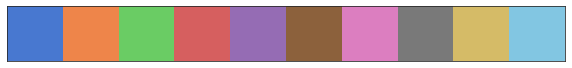

In [2]:
# Set styles 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)

%matplotlib inline
sns.set_style('white')
sns.set_palette('muted')

mpl.rcParams['figure.figsize'] = (16, 10)
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['lines.linestyle'] = '--'
mpl.rcParams['font.size'] = 12

background_color = '#f6f5f5'
col_blue = '#4878d0'
col_orange = '#ee854a'
col_green = '#6acc64'
col_red = '#d65f5f'
# Colour palette hex references 
pal = sns.color_palette('muted')
sns.palplot(pal)
print(pal.as_hex())

<a id = 'import'></a>
## Importing Data

[back to top](#toc)

In [3]:
df = pd.read_csv('..\\STB_technical_test\\stbcleaned.csv')

In [4]:
dtype_info = [
np.dtype('int64'),    
np.dtype('int32'),
pd.CategoricalDtype(categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ordered=True),
pd.CategoricalDtype(categories=['12-14', '15-19', '20-24', '25-29', '30-34', '35-39',
                                '40-44', '45-49', '50-54', '55-59', '60-64', '>65'], ordered=True),
pd.CategoricalDtype(categories=['No', 'Yes'], ordered=False),
np.dtype('int32'),
pd.CategoricalDtype(categories=['Air', 'Land', 'Sea'], ordered=False),
pd.CategoricalDtype(categories=['AWQ', 'AXM', 'A_Otr', 'GIA', 
                                'LNI', 'Land', 'SIA', 'Sea', 'VLU'], ordered=False),
np.dtype('O'),
pd.CategoricalDtype(categories=['Bus', 'Edu', 'Hea', 'Lei'], ordered=False),
pd.CategoricalDtype(categories=['No', 'Yes'], ordered=False),
pd.CategoricalDtype(categories=['No', 'Yes'], ordered=False),
pd.CategoricalDtype(categories=['No', 'Yes'], ordered=False),
np.dtype('int32'),
pd.CategoricalDtype(categories=['F&E', 'FIT', 'Pkg'], ordered=False),
pd.CategoricalDtype(categories=['Female', 'Male'], ordered=False),
pd.CategoricalDtype(categories=['No', 'Yes'], ordered=False),
np.dtype('float32'),
np.dtype('float32'),
np.dtype('float32'),
np.dtype('float32'),
np.dtype('float32'),
np.dtype('float32'),
np.dtype('float32'),
np.dtype('bool'),
np.dtype('float64'),
np.dtype('O'),
np.dtype('O'),
np.dtype('bool'),
np.dtype('bool'),
np.dtype('bool'),
np.dtype('bool'),
np.dtype('bool'),
np.dtype('bool')]

cols = ['id', 'qtr', 'mth', 'age', 'first_time_visit', 'visits_p3y', 'arrival_method',
       'carrier', 'pov', 'pov_grp', 'multi_dest', 'last_port', 'next_port',
       'stay_length', 'travel_type', 'gender', 'married', 'accom_exp',
       'shopping_exp', 'fnb_exp', 'transport_exp', 'medical_exp', 'other_exp',
       'total_exp', 'accompanying_pax', 'avg_exp', 'companions',
       'companions_total', 'comp_alone', 'comp_colleagues', 'comp_partner',
       'comp_friends', 'comp_family', 'comp_children']

In [5]:
d_map = {i:v for i, v in zip(cols, dtype_info)}
df = df.astype(d_map)

In [6]:
# set aside a deep copy in case
df_original = df.copy(deep = True) 
df_original.sample(5)

id  qtr  mth    age first_time_visit  visits_p3y arrival_method  \
2474  18801    4  Nov  45-49               No           5            Air   
438    2703    1  Feb  35-39               No          10            Air   
31      689    1  Jan  55-59               No          17            Air   
692    4806    1  Mar  25-29               No         156            Sea   
488    3077    1  Feb  30-34               No          30            Sea   

     carrier    pov pov_grp multi_dest last_port next_port  stay_length  \
2474     VLU  Gen_B     Bus         No        No        No            2   
438    A_Otr  Hea_T     Hea         No        No        No            3   
31     A_Otr    Vis     Lei         No        No        No            5   
692      Sea    Hol     Lei         No        No        No            0   
488      Sea   Attr     Lei         No        No        No            4   

     travel_type  gender married   accom_exp  shopping_exp     fnb_exp  \
2474         FIT    Male     Yes  702.799988    325.160004  167.789993   
438          FIT  Female     Yes   83.019997    556.549988   88.949997   
31           FIT    Male     Yes    0.000000   1141.550049  222.380005   
692          FIT    Male      No    0.000000    156.550003   15.650000   
488          FIT  Female      No   93.910004    156.550003  234.779999   

      transport_exp  medical_exp  other_exp    total_exp  accompanying_pax  \
2474      67.120003          0.0        0.0  1262.869995             False   
438       47.439999       7800.0        0.0  8575.969727             False   
31        62.270000          0.0        0.0  1426.199951             False   
692       31.299999          0.0        0.0   203.509995             False   
488       46.959999          0.0        0.0   532.200012             False   

          avg_exp                          companions  \
2474   631.434998                           ['Alone']   
438   2858.656576                          ['Spouse']   
31     285.239990                          ['Spouse']   
692    203.509995  ['Partner/ Boyfriend/ Girlfriend']   
488    133.050003                         ['Friends']   

                    companions_total  comp_alone  comp_colleagues  \
2474                           Alone        True            False   
438                           Spouse       False            False   
31                            Spouse       False            False   
692   Partner/ Boyfriend/ Girlfriend       False            False   
488                          Friends       False            False   

      comp_partner  comp_friends  comp_family  comp_children  
2474         False         False        False          False  
438           True         False        False          False  
31            True         False        False          False  
692           True         False        False          False  
488          False          True        False          False

<a id = 'plotfunc'></a>

## Define Plotting Function

- Define a function to aid in plotting graphs and charts

[back to top](#toc)

In [7]:
# plotting function 
def plotviz(figsize=(8, 8), rows=1, cols=1, wspace=0.2, hspace=0.2, var=[], kind='box', y=None, hue=None, 
            hue_order=None):
    # define figure
    fig = plt.figure(figsize = figsize)
    gs = fig.add_gridspec(rows, cols)
    gs.update(wspace = wspace, hspace = hspace)

    run = 0
    for row in range(rows):
        for col in range(cols):
            locals()[f'ax{run}'] = fig.add_subplot(gs[row, col])
            locals()[f'ax{run}'].set_yticklabels([])
            locals()[f'ax{run}'].tick_params(axis = 'y', which = 'both', length = 0)
            for s in ['top', 'right', 'left']:
                locals()[f'ax{run}'].spines[s].set_visible(False)
            run += 1
            
    if kind == 'box':
        run = 0
        for col in var:
            sns.boxplot(data = df, x = col, ax = locals()[f'ax{run}'], palette = 'deep')
            locals()[f'ax{run}'].grid(which = 'major', axis = 'x', zorder = 0, color = 'black', linestyle = ':', dashes = (1,5))
            locals()[f'ax{run}'].set_title(col.replace('_', ' ').capitalize(), fontsize = 10, fontweight = 'bold')
            locals()[f'ax{run}'].set_xlim(df[col].min() - 2, df[col].max() + 2)
            locals()[f'ax{run}'].set_xlabel('')
            locals()[f'ax{run}'].set_ylabel('')
            locals()[f'ax{run}'].set_xticklabels('')
            run += 1
        plt.show()
        
    if kind == 'kde':
        run = 0
        for col in var:
            sns.kdeplot(df[col], ax = locals()[f'ax{run}'], shade = True, linewidth = 0.5, color = col_blue)
            locals()[f'ax{run}'].grid(which = 'major', axis = 'x', zorder = 0, color = 'black', linestyle = ':', dashes = (1,5))
            locals()[f'ax{run}'].set_title(col.replace('_', ' ').capitalize(), fontsize = 10, fontweight = 'bold')
            locals()[f'ax{run}'].set_xlim(df[col].min() - 2, df[col].max() + 2)
            locals()[f'ax{run}'].set_xlabel('')
            locals()[f'ax{run}'].set_ylabel('')
            run += 1
        plt.show()
        
    if kind == 'bar':  
        run = 0 
        for col in var:
            df_chart = pd.DataFrame(df[col].value_counts() / len(df[col]) * 100)
            sns.barplot(x = df_chart.index, y = df_chart[col], ax = locals()[f'ax{run}'], palette = 'muted', zorder = 3, edgecolor = 'black', linewidth = 0, alpha = 0.8)
            locals()[f'ax{run}'].grid(which = 'major', axis = 'y', zorder = 0, color = 'black', linestyle = ':', dashes = (1,5))    
            locals()[f'ax{run}'].set_title(col.replace('_', ' ').capitalize(), fontsize = 12, fontweight = 'bold')
            locals()[f'ax{run}'].set_ylabel('%')
            run += 1
        plt.show()
        
    if kind == 'barh':  
        run = 0 
        for col in var:
            df_chart = pd.DataFrame(df[col].value_counts() / len(df[col]) * 100)
            sns.barplot(y = df_chart.index, x = df_chart[col], ax = locals()[f'ax{run}'], palette = 'muted', zorder = 3, edgecolor = 'black', linewidth = 0, alpha = 0.8)
            locals()[f'ax{run}'].grid(which = 'major', axis = 'x', zorder = 0, color = 'black', linestyle = ':', dashes = (1,5))    
            locals()[f'ax{run}'].set_title(col.replace('_', ' ').capitalize(), fontsize = 12, fontweight = 'bold')
            locals()[f'ax{run}'].set_ylabel('')
            locals()[f'ax{run}'].set_xlabel('%')
            run += 1
        plt.show()
        
    if kind == 'vio':  
        run = 0
        for col in var:
            sns.violinplot(data=df, x=col, y=y, hue=hue, hue_order=hue_order,
                           ax=locals()[f'ax{run}'], split=True, palette = 'pastel')
            locals()[f'ax{run}'].grid(which = 'major', axis = 'y', zorder = 0, color = 'black', linestyle = ':', dashes = (1,5))
            # locals()[f'ax{run}'].legend('', '')
            locals()[f'ax{run}'].set_title(col.replace('_', ' ').capitalize(), fontsize = 12, fontweight = 'bold')
            locals()[f'ax{run}'].set_xlabel('')
            locals()[f'ax{run}'].set_ylabel(y.replace('_', ' '), fontsize = 12)
            run += 1
        plt.show()
        
    if kind == 'swarm':  
        run = 0
        for col in var:
            sns.swarmplot(data=df, x=col, y=y, hue=hue, hue_order=hue_order,
                           ax=locals()[f'ax{run}'], split=True, palette = 'pastel')
            locals()[f'ax{run}'].grid(which = 'major', axis = 'y', zorder = 0, color = 'black', linestyle = ':', dashes = (1,5))
            # locals()[f'ax{run}'].legend('', '')
            locals()[f'ax{run}'].set_title(col.replace('_', ' ').capitalize(), fontsize = 12, fontweight = 'bold')
            locals()[f'ax{run}'].set_xlabel('')
            locals()[f'ax{run}'].set_ylabel(y.replace('_', ' '), fontsize = 12)
            run += 1
        plt.show()

<a id = 'groups'></a>
## Groups 

- Define some groups based on the nature of the variables
- Companions: comp_alone, comp_colleagues, comp_partner, comp_friends, comp_family, comp_children
- Numerical variables: visits_p3y, stay_length, accom_exp, shopping_exp, fnb_exp, transport_exp, medical_exp, other_exp, total_exp, avg_exp

[back to top](#toc)

In [8]:
# set some variables
drop = ['companions', 'companions_total', 'next_port']

misc = ['qtr', 'mth']

cat_vars = ['age', 'first_time_visit', 'arrival_method', 'carrier', 
            'pov', 'pov_grp', 'multi_dest', 'last_port', 'travel_type', 'gender', 
            'married', 'accompanying_pax', 'comp_alone', 'comp_colleagues', 
            'comp_partner', 'comp_friends', 'comp_family', 'comp_children']

demo = ['age', 'first_time_visit', 'arrival_method', 'carrier', 
        'pov', 'pov_grp', 'multi_dest', 'last_port', 'travel_type', 
        'gender', 'married']

companions = ['comp_alone', 'comp_colleagues', 'comp_partner', 
              'comp_friends', 'comp_family', 'comp_children']

num_vars = ['visits_p3y', 'stay_length', 'accom_exp', 'shopping_exp', 'fnb_exp', 
            'transport_exp', 'medical_exp', 'other_exp', 'total_exp', 'avg_exp']

In [9]:
df.drop(columns=drop, inplace=True)

In [10]:
df.set_index('id', inplace=True)

<a id = 'outliers'></a>
## Outliers Check - Boxplots

- Generate some boxplots to check for outliers

[back to top](#toc)

In [11]:
df[num_vars].describe().T
# shopping_exp max 597_415 > id 13204
# accom_exp, fnb_exp, transport_exp min 0

count         mean           std         min         25%  \
visits_p3y     2952.0    16.554878     37.408753    0.000000    2.000000   
stay_length    2952.0     3.707317      6.505664    0.000000    0.000000   
accom_exp      2952.0   140.422409    260.518921    0.000000    0.000000   
shopping_exp   2952.0   544.869446  10999.109375  125.160004  145.160004   
fnb_exp        2952.0    88.625839    169.825546    0.000000   18.407500   
transport_exp  2952.0    41.407719     52.176941    0.000000   11.260000   
medical_exp    2952.0   240.133179   1550.233887    0.000000    0.000000   
other_exp      2952.0     2.466440     35.263859    0.000000    0.000000   
total_exp      2952.0  1057.924316  11115.077148  125.160004  240.294998   
avg_exp        2952.0   636.424193  11017.045205    3.388596  139.699997   

                      50%         75%            max  
visits_p3y       5.000000   15.000000     780.000000  
stay_length      2.000000    4.000000      60.000000  
accom_exp        0.000000  179.199997    2151.800049  
shopping_exp   206.550003  345.160004  597415.562500  
fnb_exp         53.375000  107.260002    5337.149902  
transport_exp   25.620001   52.169998     715.049988  
medical_exp      0.000000    0.000000   30000.000000  
other_exp        0.000000    0.000000    1000.000000  
total_exp      437.104996  916.209991  597555.125000  
avg_exp        237.945000  473.703328  597555.125000

In [12]:
# examine the outlier
df[df['shopping_exp'] == 597415.562500]

qtr  mth    age first_time_visit  visits_p3y arrival_method carrier  \
id                                                                           
13204    3  Aug  35-39              Yes           0            Air     LNI   

           pov pov_grp multi_dest last_port  stay_length travel_type gender  \
id                                                                            
13204  Otr_Bus     Bus        Yes        No            1         Pkg   Male   

      married  accom_exp  shopping_exp  fnb_exp  transport_exp  medical_exp  \
id                                                                            
13204     Yes  73.330002   597415.5625    13.75           52.5          0.0   

       other_exp   total_exp  accompanying_pax     avg_exp  comp_alone  \
id                                                                       
13204        0.0  597555.125             False  597555.125       False   

       comp_colleagues  comp_partner  comp_friends  comp_family  comp_children  
id                                                                              
13204            False         False         False        False          False

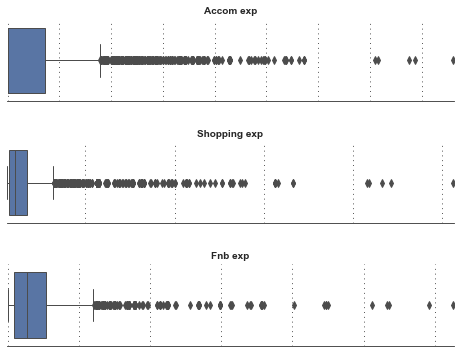

In [138]:
plotviz(figsize=(8, 6), rows=3, cols=1, wspace=0.2, hspace=0.5, 
        var=['accom_exp', 'shopping_exp', 'fnb_exp'], kind='box')

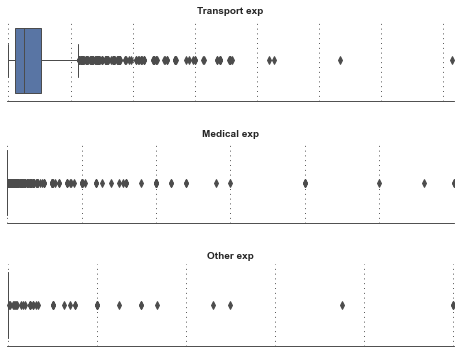

In [14]:
plotviz(figsize=(8, 6), rows=3, cols=1, wspace=0.2, hspace=0.5, 
        var=['transport_exp', 'medical_exp', 'other_exp'], kind='box')

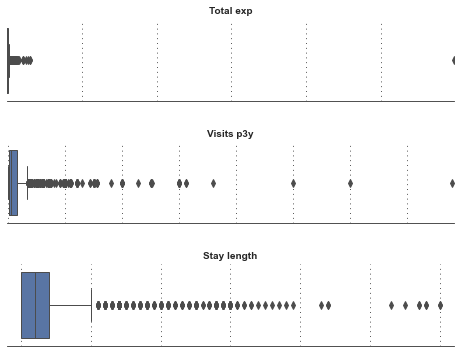

In [15]:
plotviz(figsize=(8, 6), rows=3, cols=1, wspace=0.2, hspace=0.5, 
        var=['total_exp', 'visits_p3y', 'stay_length'], kind='box')

In [12]:
df.loc[549, 'stay_length']

2

In [16]:
# identifying the outliers
display(df['fnb_exp'].nlargest(3))
# ids 549, 14086, 19790 > in the 5000 SGD region; 

display(df['shopping_exp'].nlargest(2))
# id 13204, 15539

display(df['stay_length'].nlargest(3))

display(df['visits_p3y'].nlargest(3))
# id 2500, 1932, 18754            

id
549      5337.149902
14086    4469.089844
19790    2013.520020
Name: fnb_exp, dtype: float32

id
13204    597415.562500
1491      12856.549805
Name: shopping_exp, dtype: float32

id
10518    60
13494    60
7663     58
Name: stay_length, dtype: int32

id
2500     780
1932     600
18754    500
Name: visits_p3y, dtype: int32

In [17]:
df.drop(labels=[549, 14086, 19790, 13204, 1491, 2500, 1932, 18754], axis=0, inplace=True)

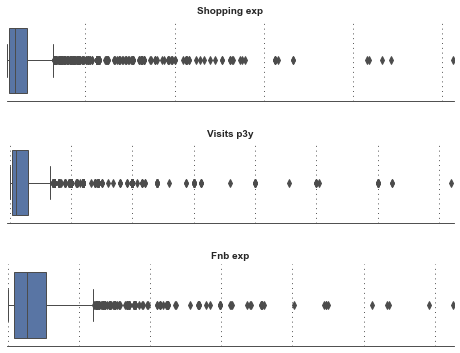

In [18]:
plotviz(figsize=(8, 6), rows=3, cols=1, wspace=0.2, hspace=0.5, 
        var=['shopping_exp', 'visits_p3y', 'fnb_exp'], kind='box')

<a id = 'eda'></a>
## Overall EDA

- Generate pairplots from variables
- Segment by gender and marital status

[back to top](#toc)

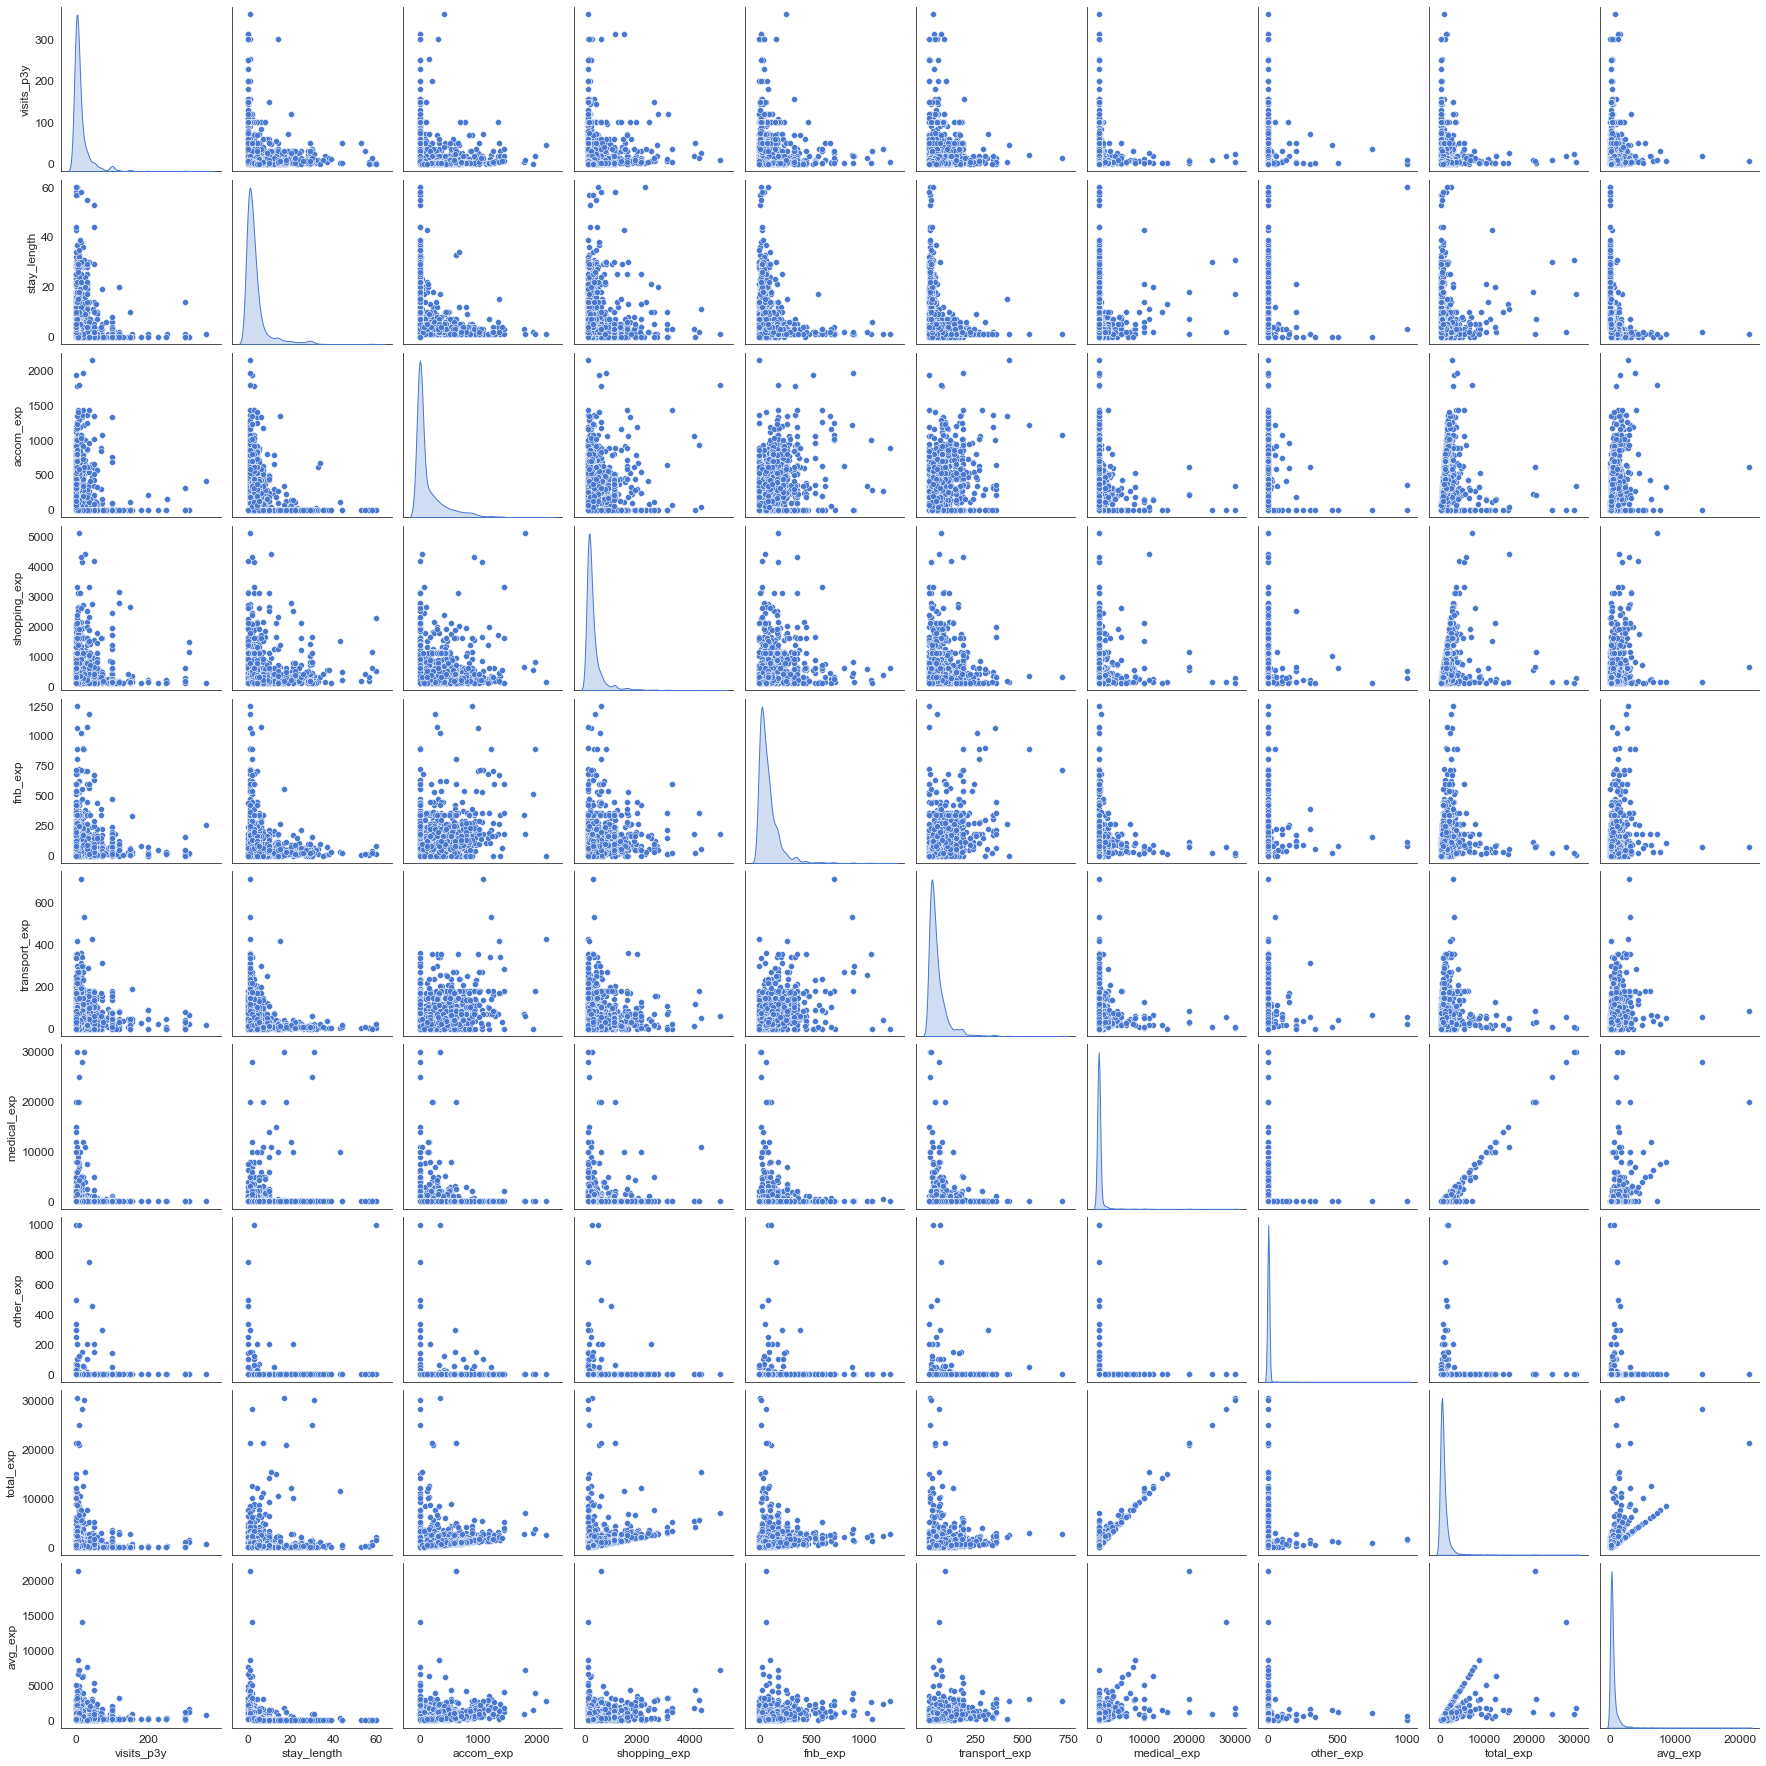

In [19]:
sns.pairplot(df[num_vars], diag_kind='kde')
plt.show()

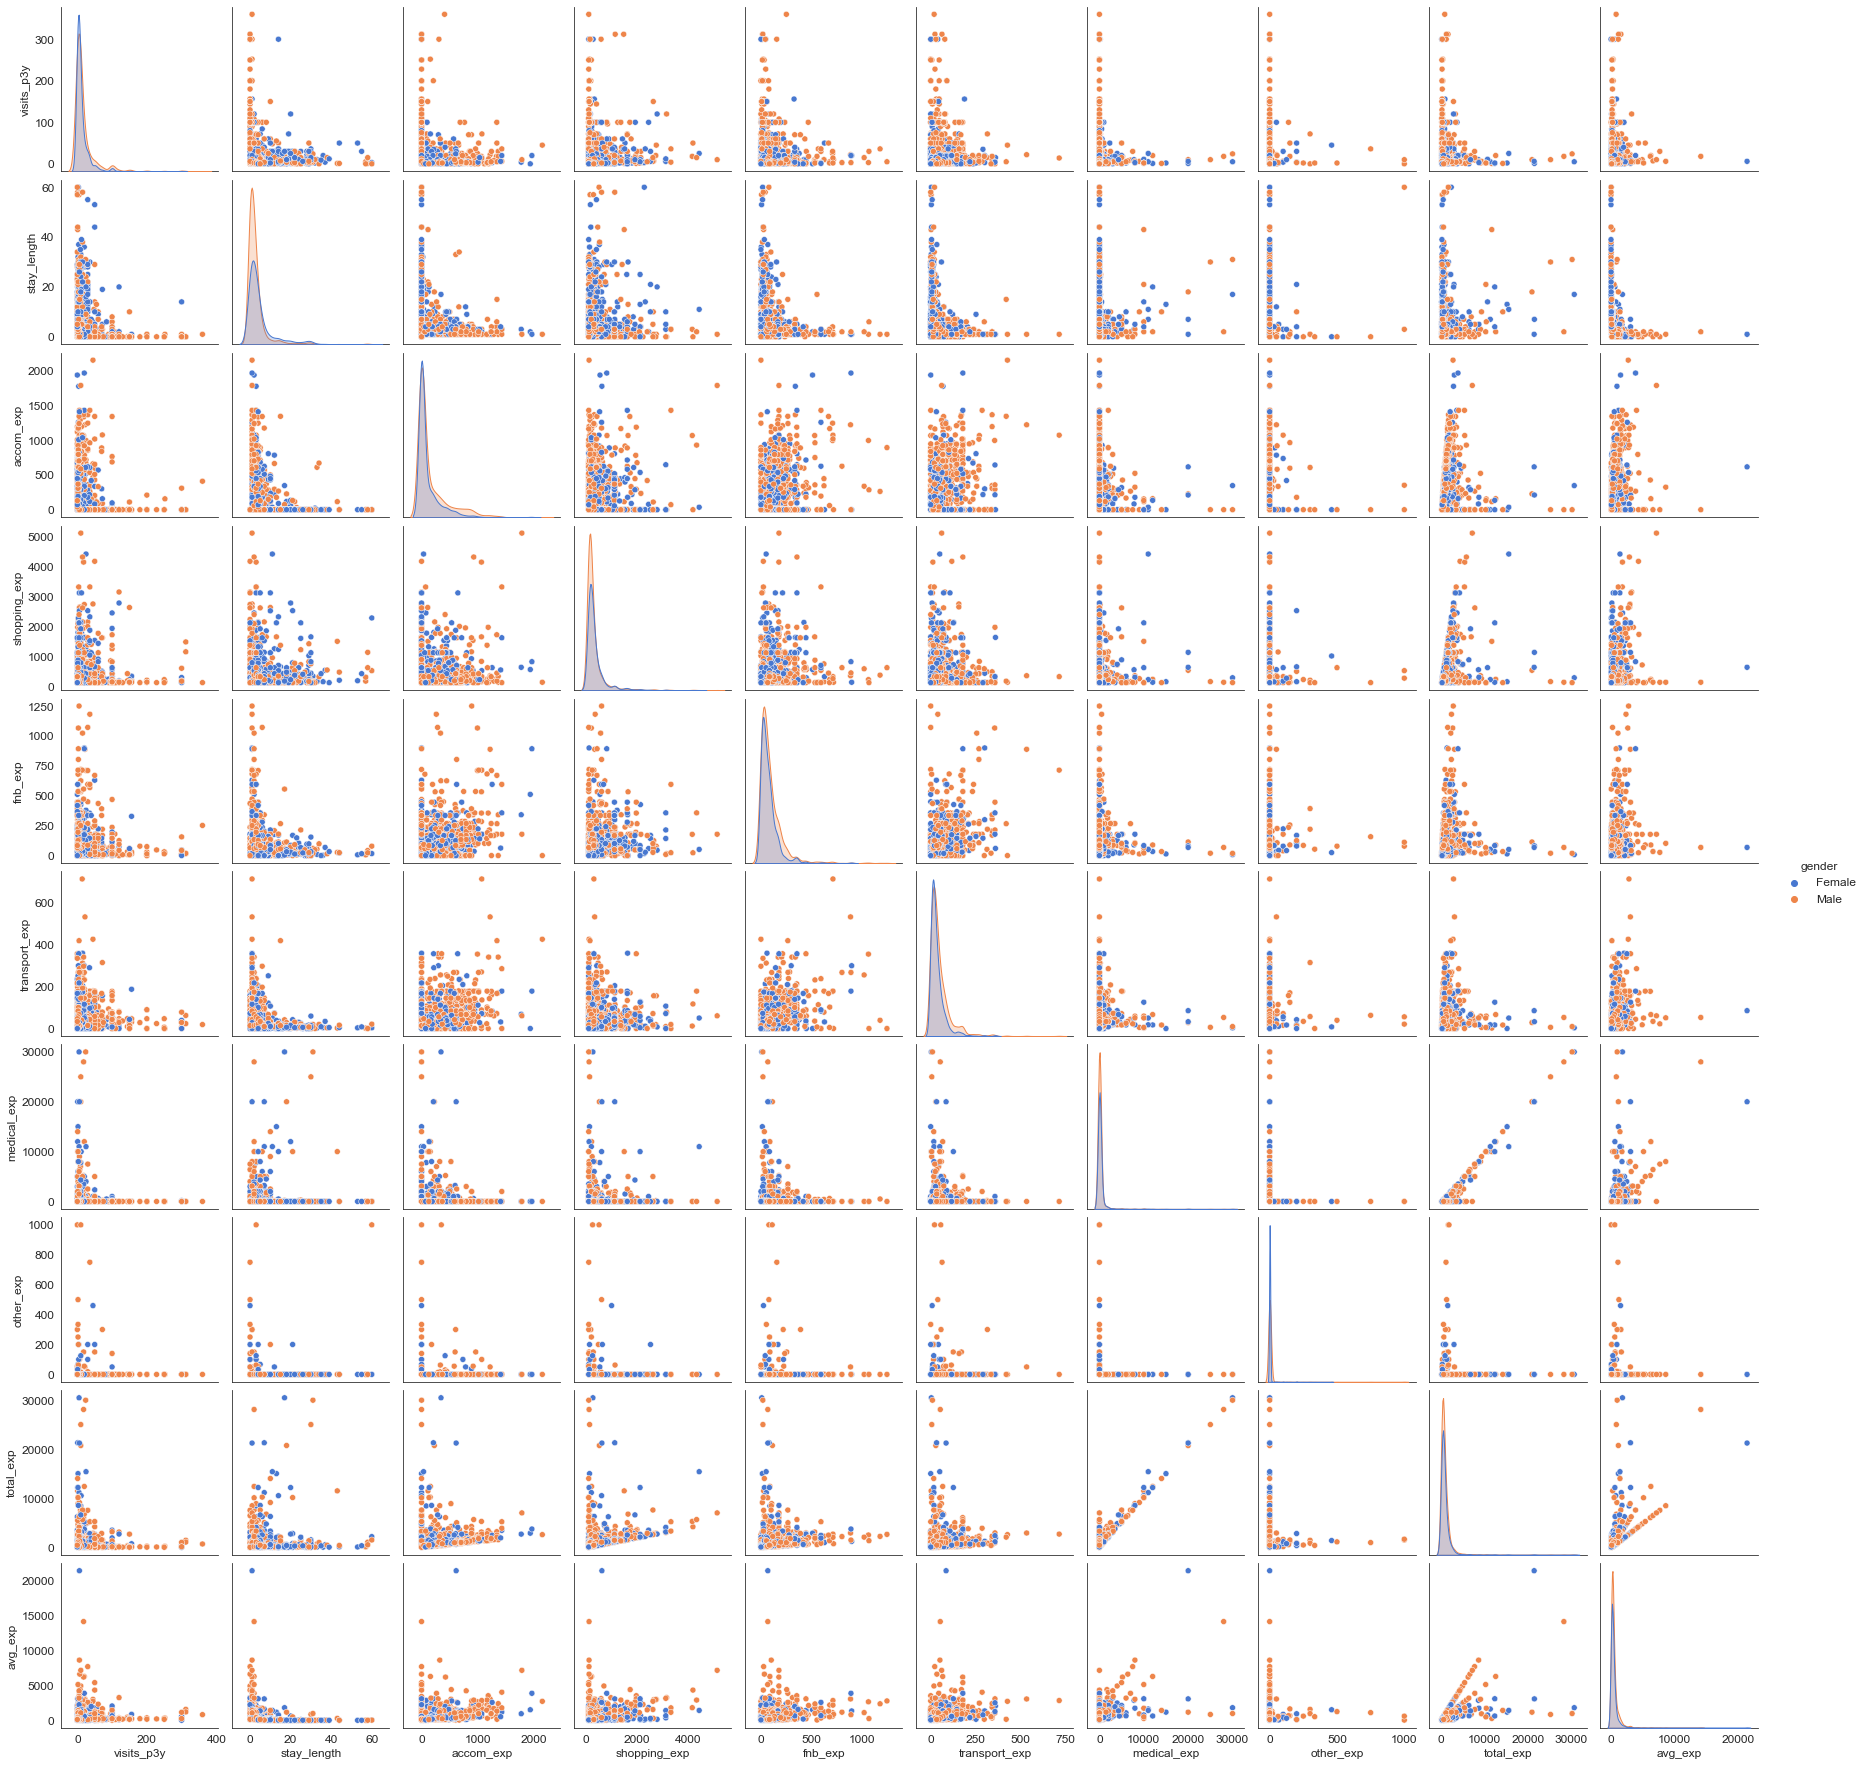

In [20]:
# split by Gender
sns.pairplot(df[num_vars + ['gender']], hue = 'gender', 
             diag_kind = 'kde', diag_kws = {'shade': True})
plt.show()

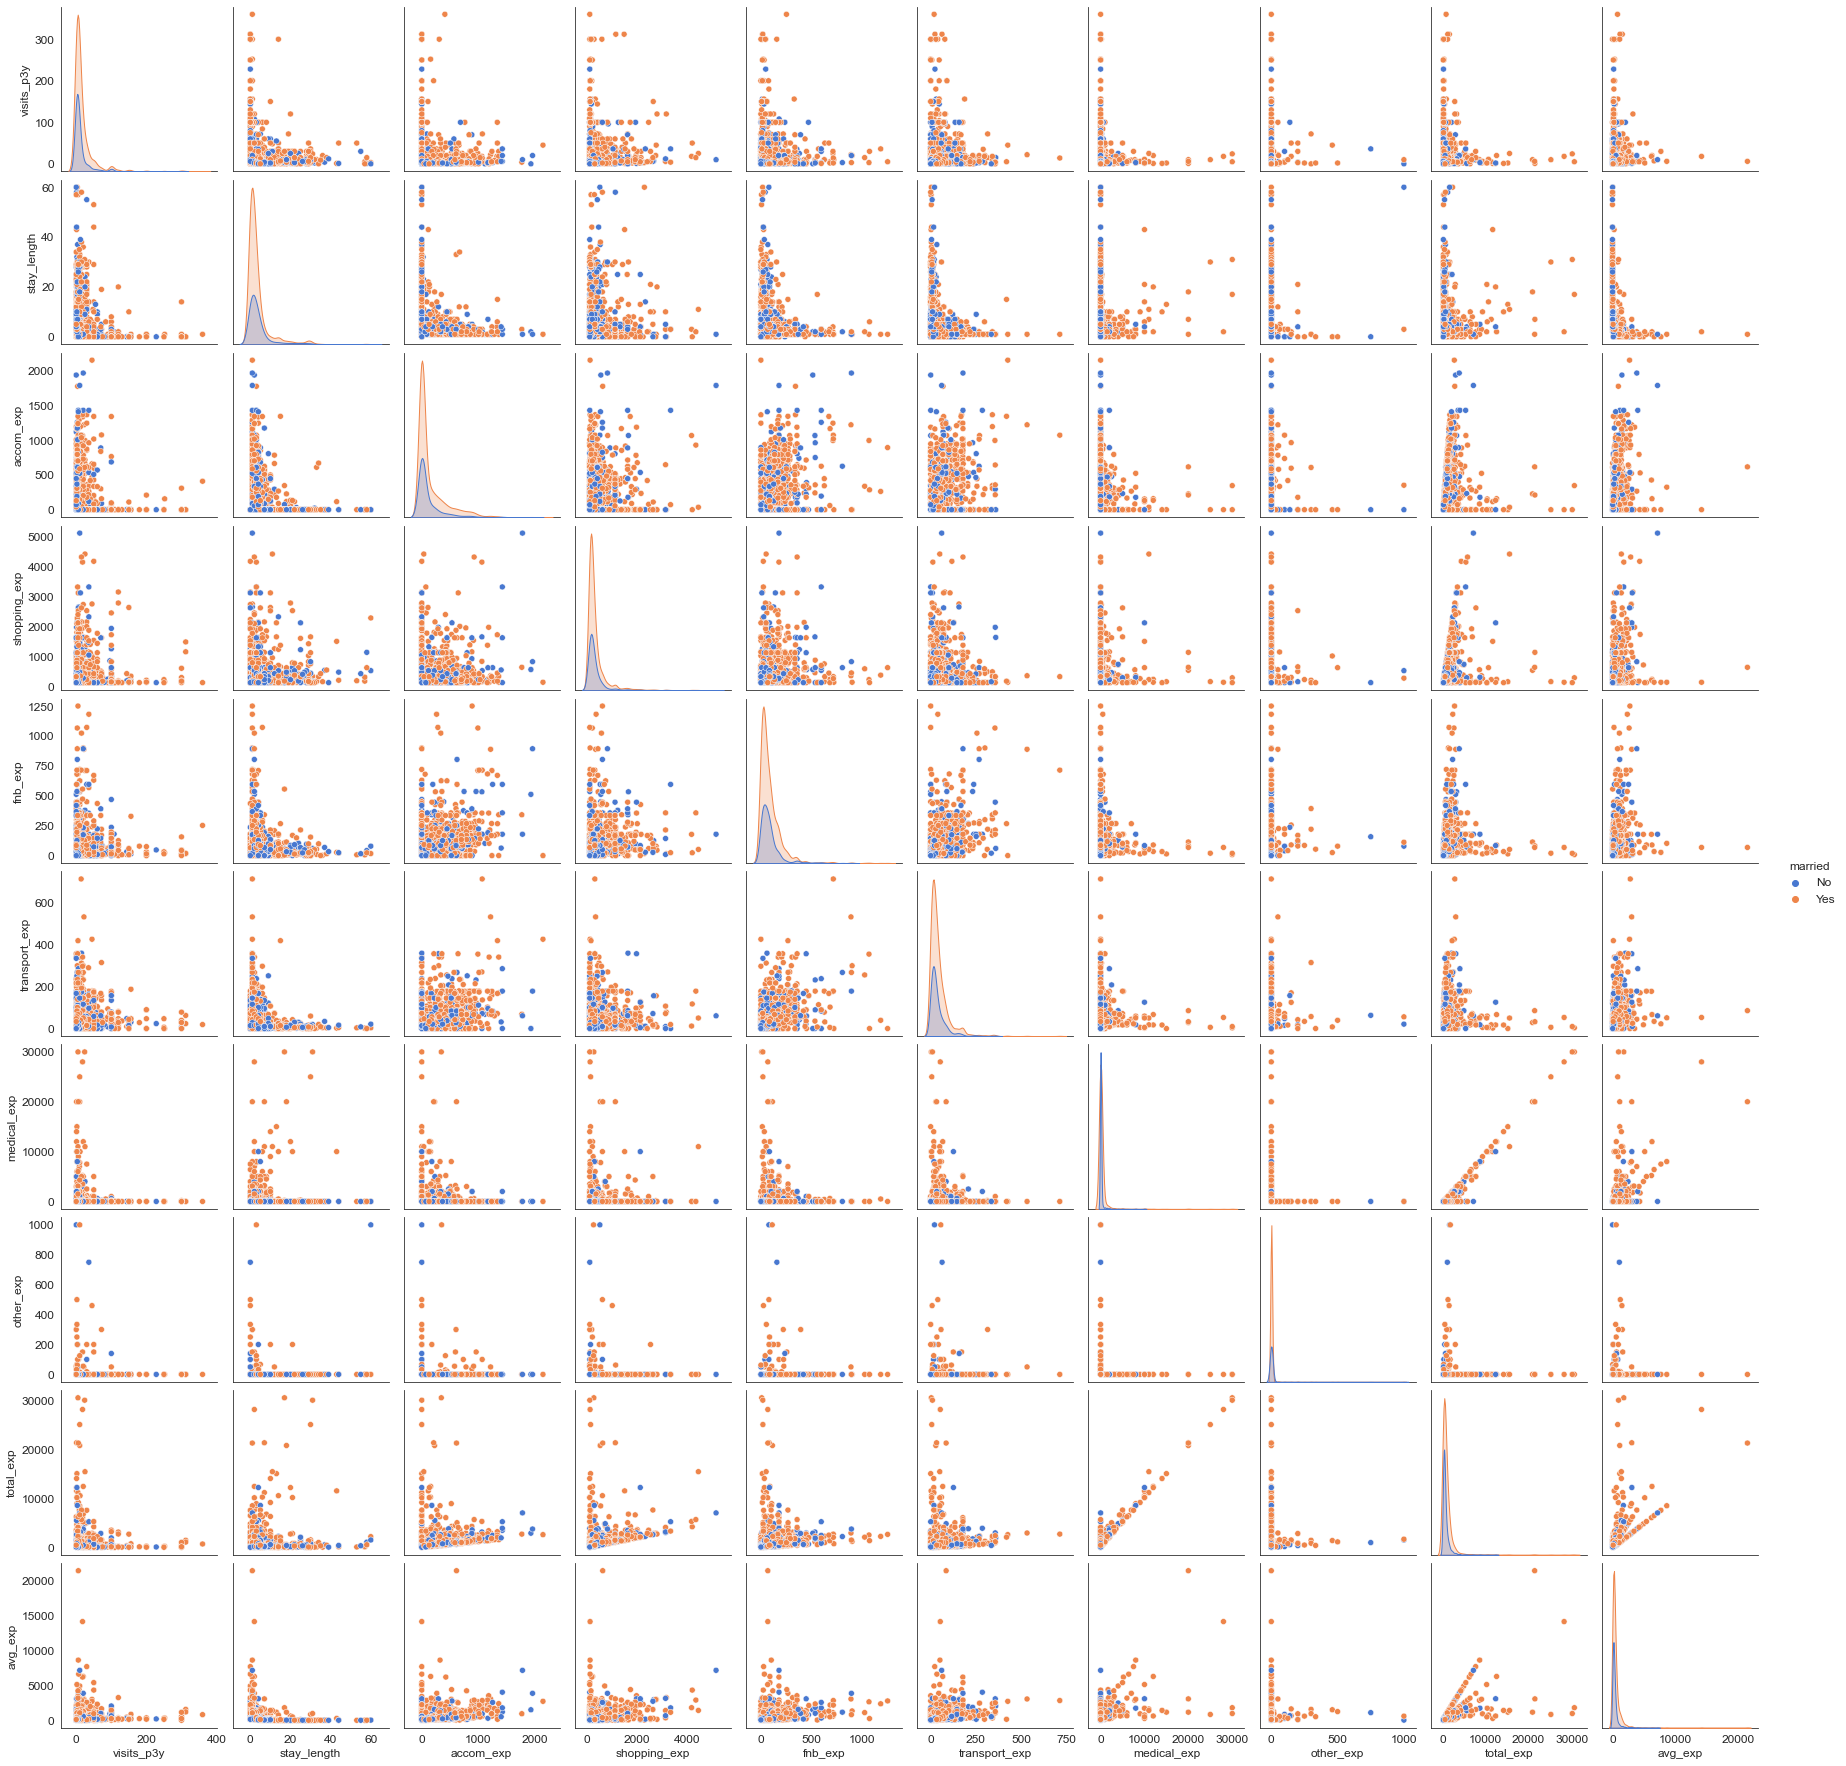

In [21]:
# split by Marriage
sns.pairplot(df[num_vars + ['married']], hue = 'married', 
             diag_kind = 'kde', diag_kws = {'shade': True})
plt.show()

<a id = 'contkde'></a>
## Continuous Variables - KDE plots

Notes 
- Distributions are mostly skewed to the right, indicating some very common high spenders / stayers / visitors

[back to top](#toc)

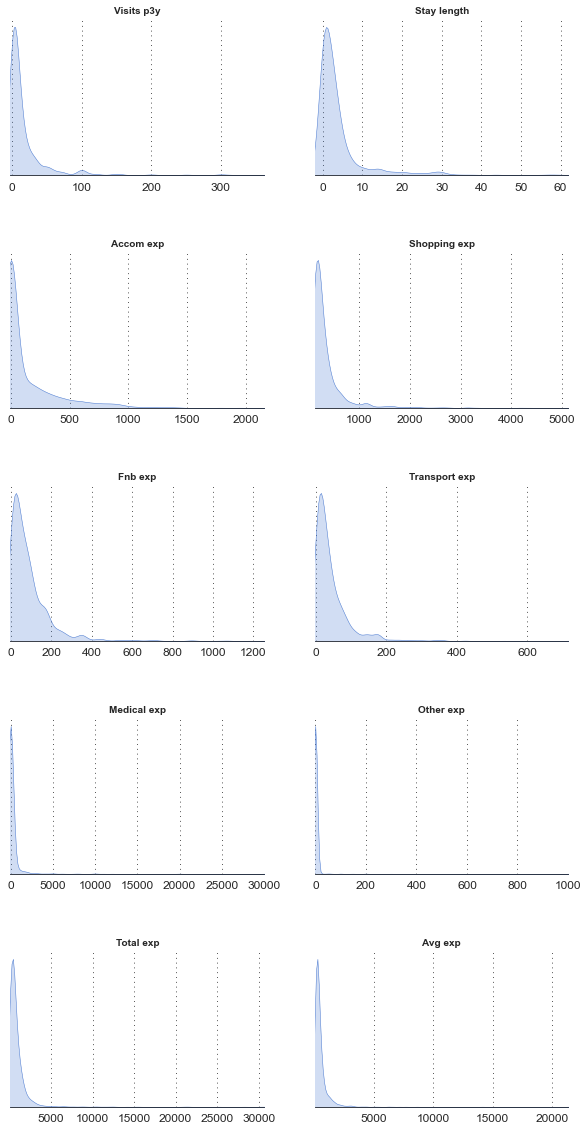

In [22]:
plotviz(figsize=(10, 20), rows=5, cols=2, wspace=0.2, hspace=0.5, 
        var=num_vars, kind='kde')

<a id = 'contstay'></a>
## Continuous Variables Against Stay Length 

[back to top](#toc)

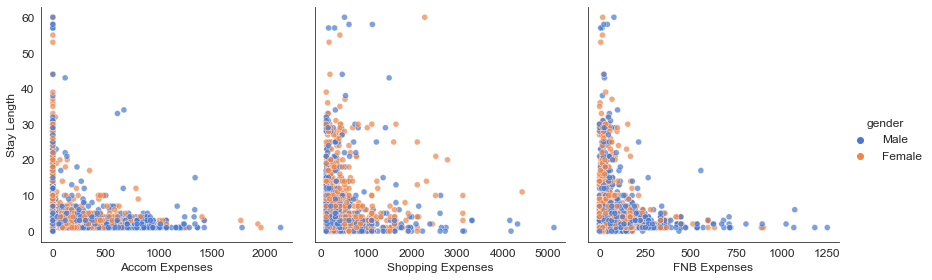

In [23]:
g = sns.PairGrid(df, x_vars = ['accom_exp', 'shopping_exp', 'fnb_exp'], 
                 y_vars = ['stay_length'], 
                 hue='gender', hue_order=['Male', 'Female'],
                 diag_sharey=True, 
                 height=4, aspect=1)
g.map(sns.scatterplot, alpha=0.7)
g.add_legend()
g.axes[0, 0].yaxis.set_label_text('Stay Length')
g.axes[0, 0].xaxis.set_label_text('Accom Expenses')
g.axes[0, 1].xaxis.set_label_text('Shopping Expenses')
g.axes[0, 2].xaxis.set_label_text('FNB Expenses')
plt.show()

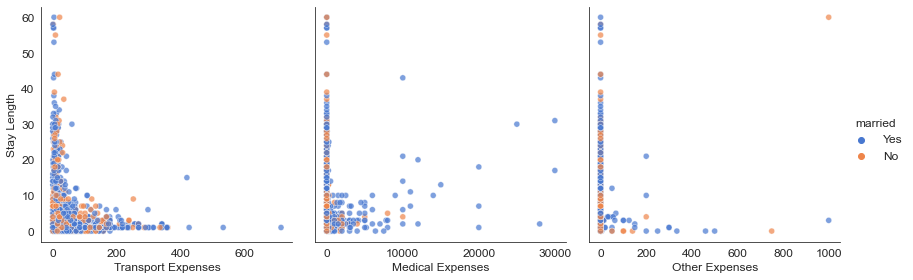

In [24]:
g = sns.PairGrid(df, x_vars = ['transport_exp', 'medical_exp', 'other_exp'], 
                 y_vars = ['stay_length'], 
                 hue='married', hue_order=['Yes', 'No'],
                 diag_sharey=True, 
                 height=4, aspect=1)
g.map(sns.scatterplot, alpha=0.7)
g.add_legend()
g.axes[0, 0].yaxis.set_label_text('Stay Length')
g.axes[0, 0].xaxis.set_label_text('Transport Expenses')
g.axes[0, 1].xaxis.set_label_text('Medical Expenses')
g.axes[0, 2].xaxis.set_label_text('Other Expenses')
plt.show()

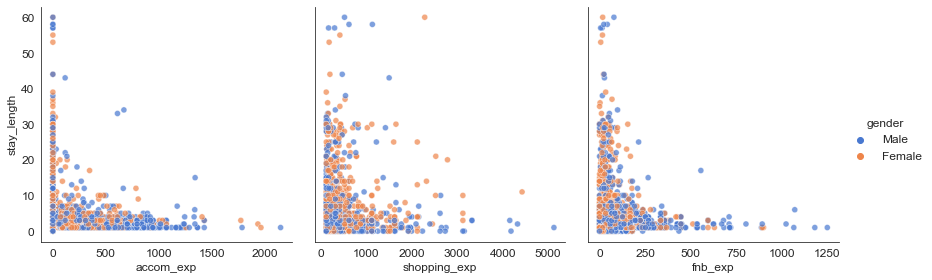

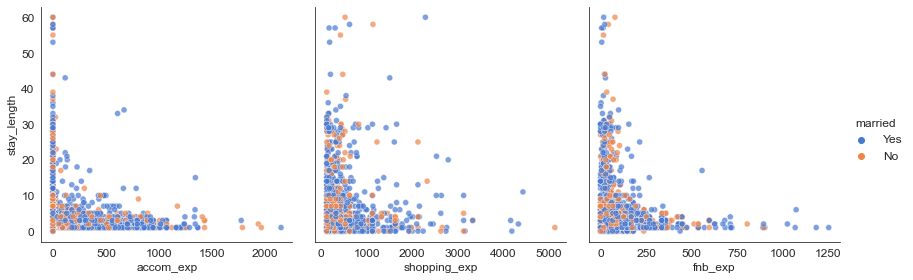

In [25]:
g = sns.PairGrid(df, x_vars = ['accom_exp', 'shopping_exp', 'fnb_exp'], 
                 y_vars = ["stay_length"], 
                 hue='gender', hue_order=['Male', 'Female'],
                 diag_sharey=True, 
                 height=4, aspect=1)
g.map(sns.scatterplot, alpha=0.7)
g.add_legend()
plt.show()

g = sns.PairGrid(df, x_vars = ['accom_exp', 'shopping_exp', 'fnb_exp'], 
                 y_vars = ["stay_length"], 
                 hue='married',
                 hue_order=['Yes', 'No'],
                 diag_sharey=True, 
                 height=4, aspect=1)
g.map(sns.scatterplot, alpha=0.7)
g.add_legend()
plt.show()

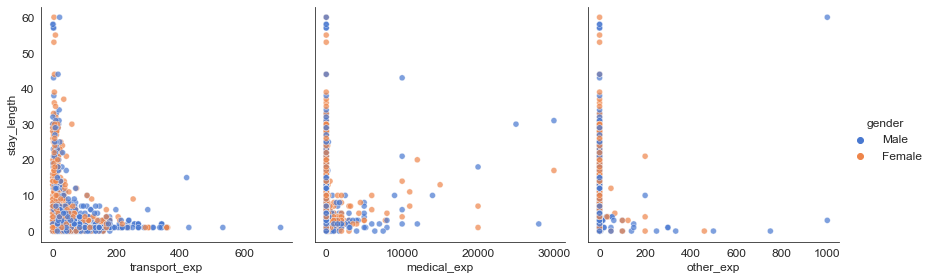

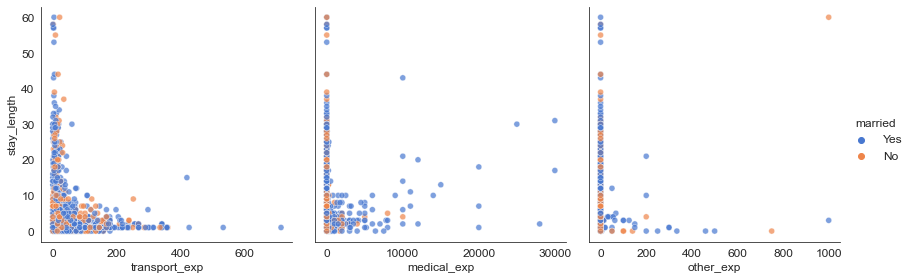

In [26]:
g = sns.PairGrid(df, x_vars = ['transport_exp', 'medical_exp', 'other_exp'], 
                 y_vars = ["stay_length"], 
                 hue='gender', hue_order=['Male', 'Female'],
                 diag_sharey=True, 
                 height=4, aspect=1)
g.map(sns.scatterplot, alpha=0.7)
g.add_legend()
plt.show()

g = sns.PairGrid(df, x_vars = ['transport_exp', 'medical_exp', 'other_exp'], 
                 y_vars = ["stay_length"], 
                 hue='married',
                 hue_order=['Yes', 'No'],
                 diag_sharey=True, 
                 height=4, aspect=1)
g.map(sns.scatterplot, alpha=0.7)
g.add_legend()
plt.show()

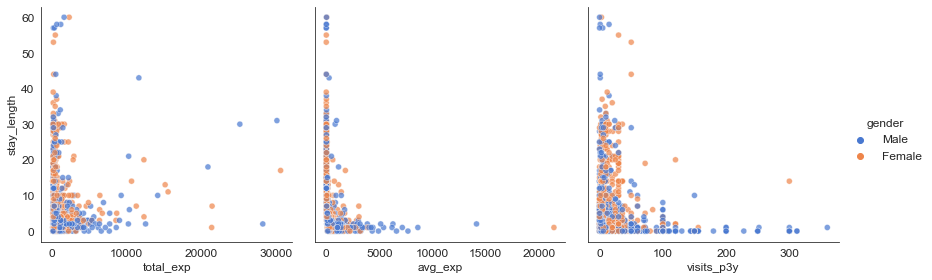

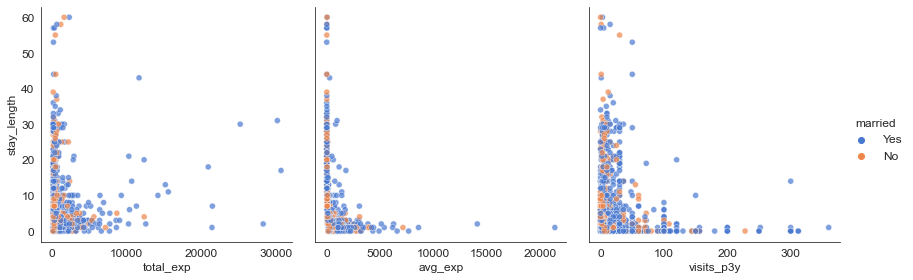

In [27]:
g = sns.PairGrid(df, x_vars = ['total_exp', 'avg_exp', 'visits_p3y'], 
                 y_vars = ["stay_length"], 
                 hue='gender', hue_order=['Male', 'Female'],
                 diag_sharey=True, 
                 height=4, aspect=1)
g.map(sns.scatterplot, alpha=0.7)
g.add_legend()
plt.show()

g = sns.PairGrid(df, x_vars = ['total_exp', 'avg_exp', 'visits_p3y'], 
                 y_vars = ["stay_length"], 
                 hue='married',
                 hue_order=['Yes', 'No'],
                 diag_sharey=True, 
                 height=4, aspect=1)
g.map(sns.scatterplot, alpha=0.7)
g.add_legend()
plt.show()

<a id = 'contp3y'></a>
## Continuous Variables Against Visits P3Y

[back to top](#toc)

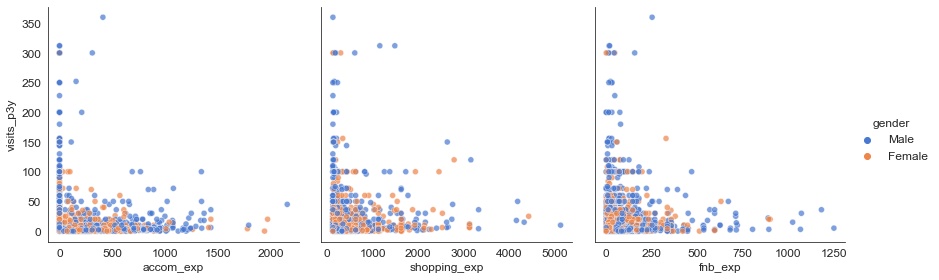

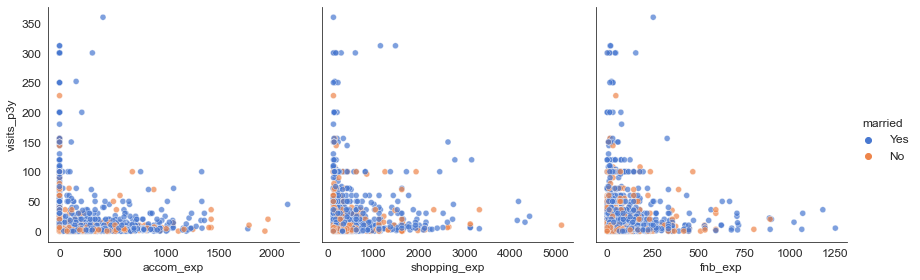

In [28]:
g = sns.PairGrid(df, x_vars = ['accom_exp', 'shopping_exp', 'fnb_exp'], 
                 y_vars = ['visits_p3y'], 
                 hue='gender', hue_order=['Male', 'Female'],
                 diag_sharey=True, 
                 height=4, aspect=1)
g.map(sns.scatterplot, alpha=0.7)
g.add_legend()
plt.show()

g = sns.PairGrid(df, x_vars = ['accom_exp', 'shopping_exp', 'fnb_exp'], 
                 y_vars = ['visits_p3y'], 
                 hue='married',
                 hue_order=['Yes', 'No'],
                 diag_sharey=True, 
                 height=4, aspect=1)
g.map(sns.scatterplot, alpha=0.7)
g.add_legend()
plt.show()

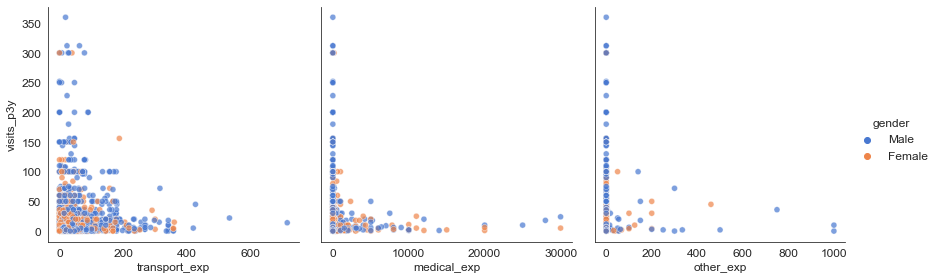

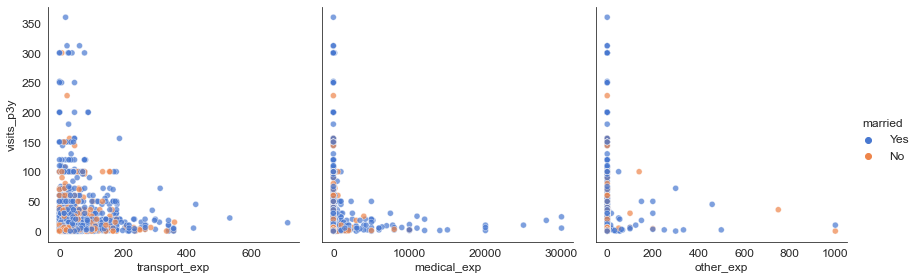

In [29]:
g = sns.PairGrid(df, x_vars = ['transport_exp', 'medical_exp', 'other_exp'], 
                 y_vars = ['visits_p3y'], 
                 hue='gender', hue_order=['Male', 'Female'],
                 diag_sharey=True, 
                 height=4, aspect=1)
g.map(sns.scatterplot, alpha=0.7)
g.add_legend()
plt.show()

g = sns.PairGrid(df, x_vars = ['transport_exp', 'medical_exp', 'other_exp'], 
                 y_vars = ['visits_p3y'], 
                 hue='married',
                 hue_order=['Yes', 'No'],
                 diag_sharey=True, 
                 height=4, aspect=1)
g.map(sns.scatterplot, alpha=0.7)
g.add_legend()
plt.show()

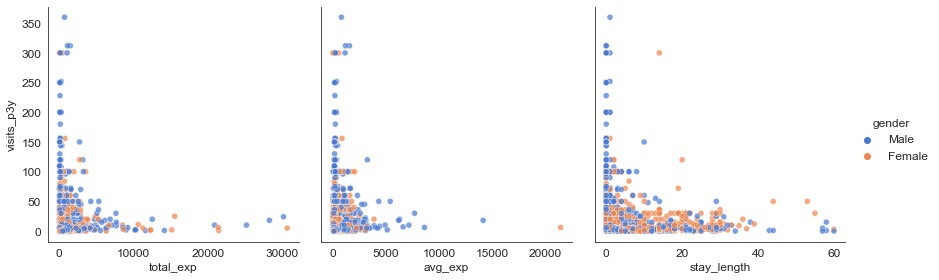

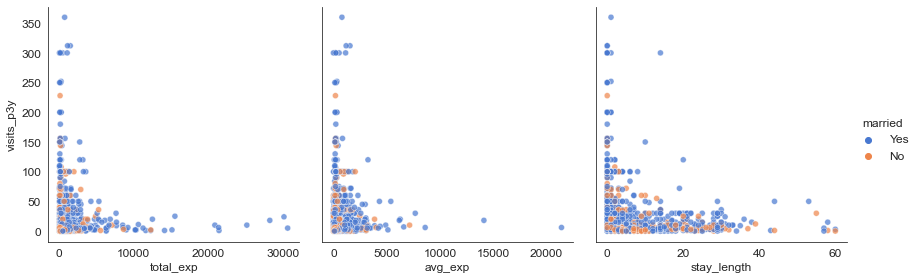

In [30]:
g = sns.PairGrid(df, x_vars = ['total_exp', 'avg_exp', 'stay_length'], 
                 y_vars = ['visits_p3y'], 
                 hue='gender', hue_order=['Male', 'Female'],
                 diag_sharey=True, 
                 height=4, aspect=1)
g.map(sns.scatterplot, alpha=0.7)
g.add_legend()
plt.show()

g = sns.PairGrid(df, x_vars = ['total_exp', 'avg_exp', 'stay_length'], 
                 y_vars = ['visits_p3y'], 
                 hue='married',
                 hue_order=['Yes', 'No'],
                 diag_sharey=True, 
                 height=4, aspect=1)
g.map(sns.scatterplot, alpha=0.7)
g.add_legend()
plt.show()

<a id = 'catbar'></a>
## Categorical Variables - Barplots

[back to top](#toc)


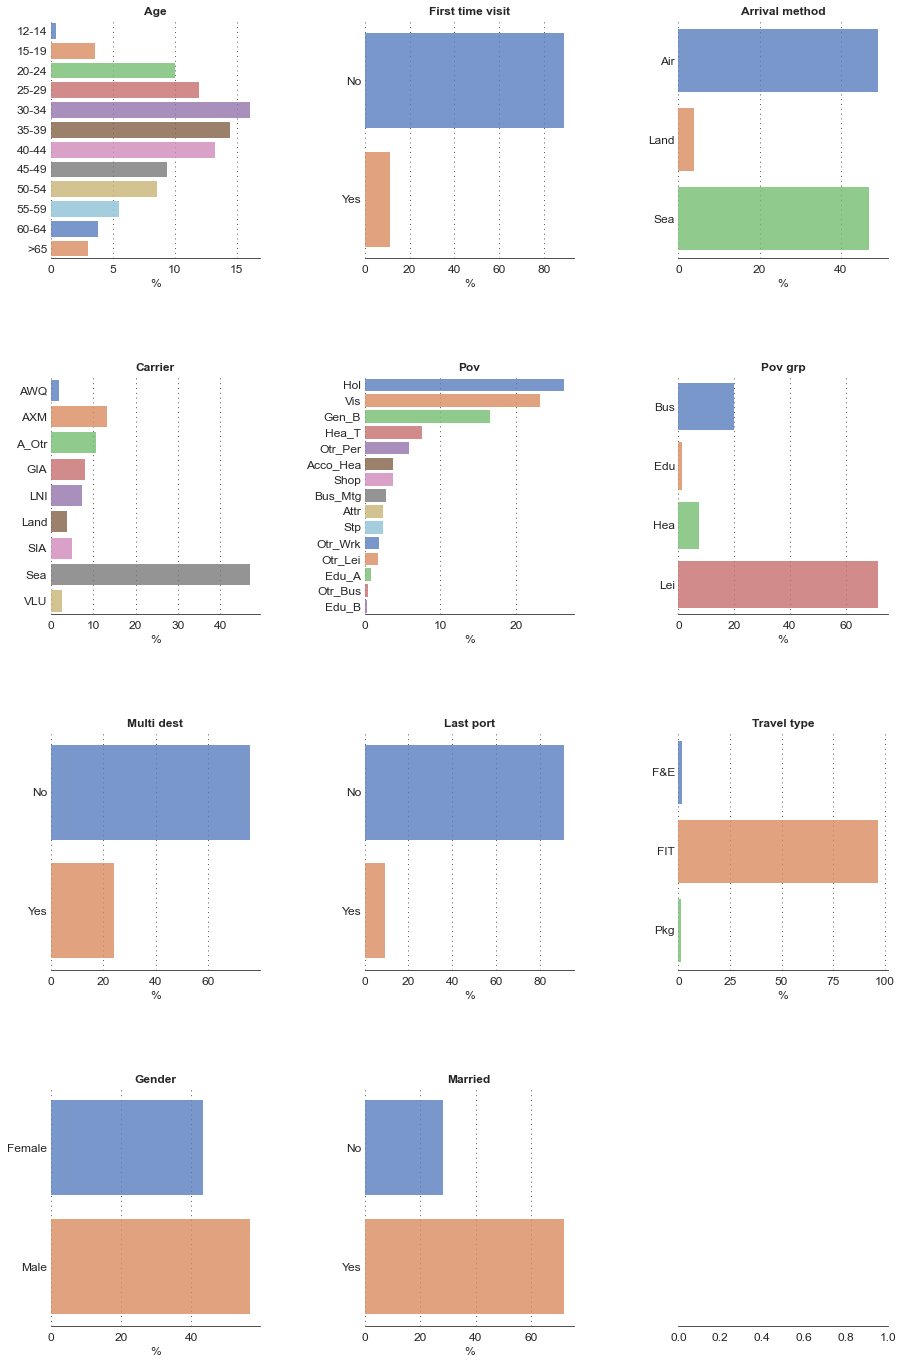

In [31]:
# Barplots
plotviz(figsize=(15, 24), rows=4, cols=3, wspace=0.5, hspace=0.5, 
        var=demo, kind='barh')

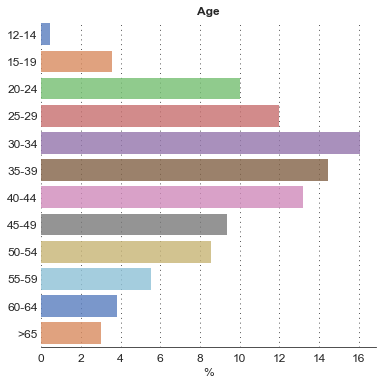

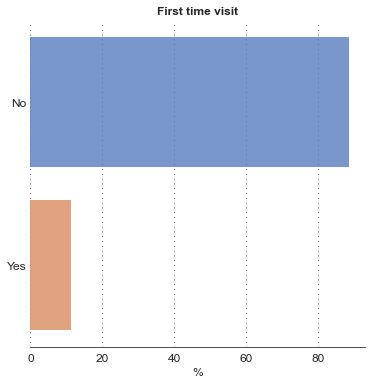

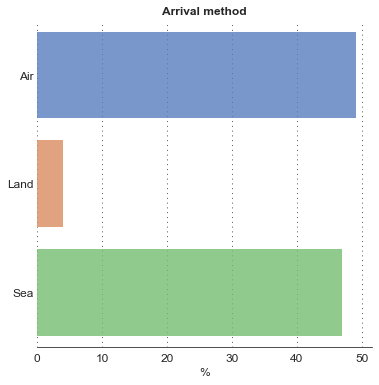

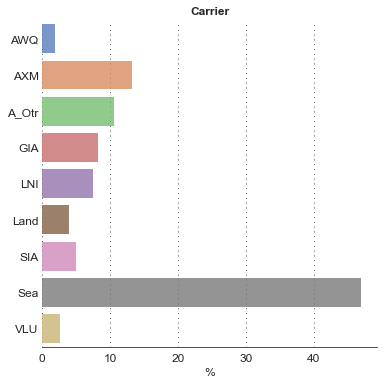

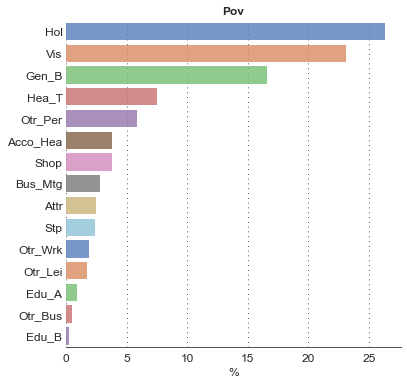

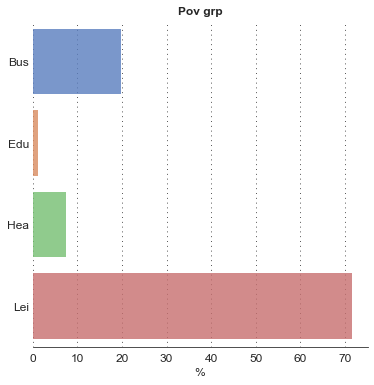

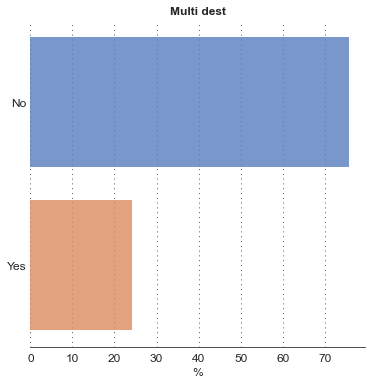

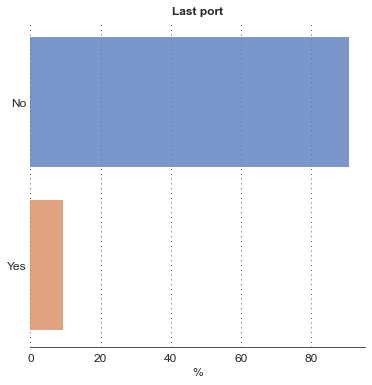

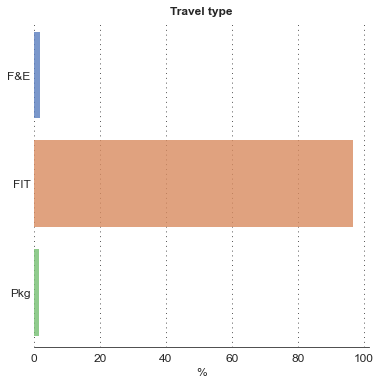

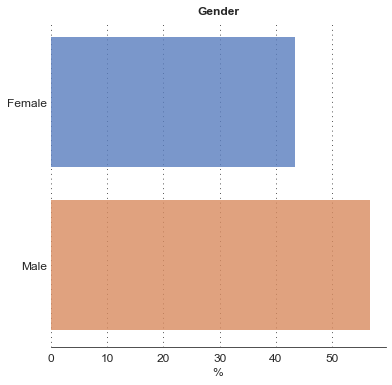

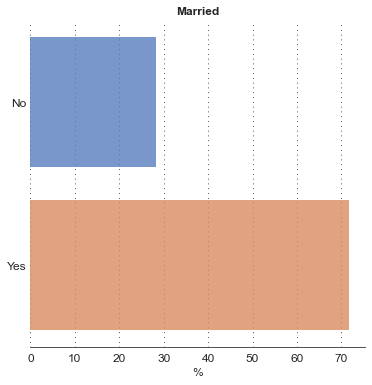

In [32]:
for col in demo:
    plotviz(figsize=(6, 6), rows=1, cols=1, wspace=0.5, hspace=0.5, var=[col], kind='barh')

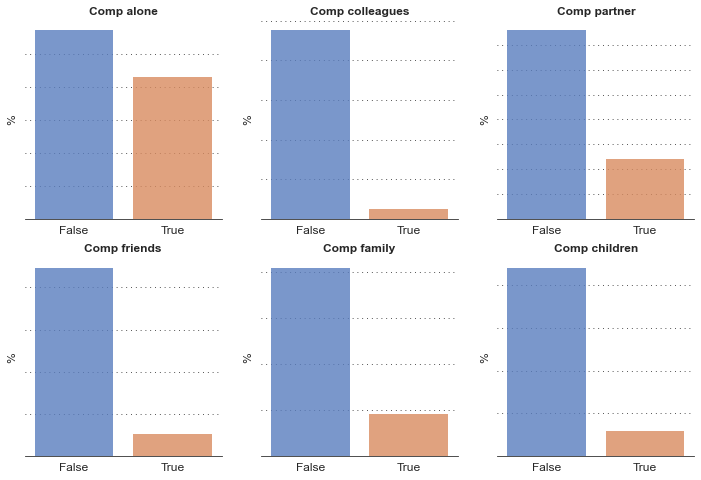

In [33]:
# Accompanying / Companion
plotviz(figsize=(12, 8), rows=2, cols=3, wspace=0.2, hspace=0.2, 
        var=companions, kind='bar')

<a id = 'cattotalexp'></a>
## Total Expenses by Categories

- Differences in total expenses amongst companion makeups 
- Differences in total expenses amongst age, gender, married, first timers 

[back to top](#toc)


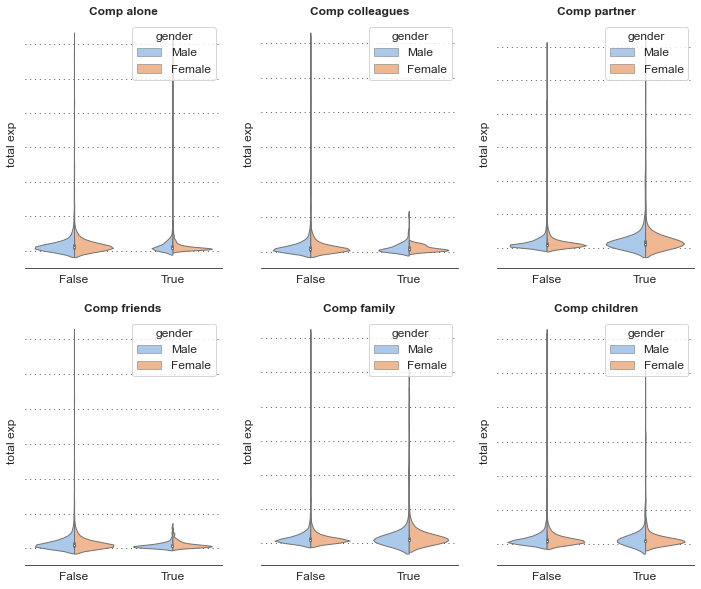

In [34]:
# total expenses by companions
plotviz(figsize=(12, 10), rows=2, cols=3, wspace=0.2, hspace=0.2, 
        var=companions, kind='vio', y='total_exp', hue='gender', hue_order=['Male', 'Female'])

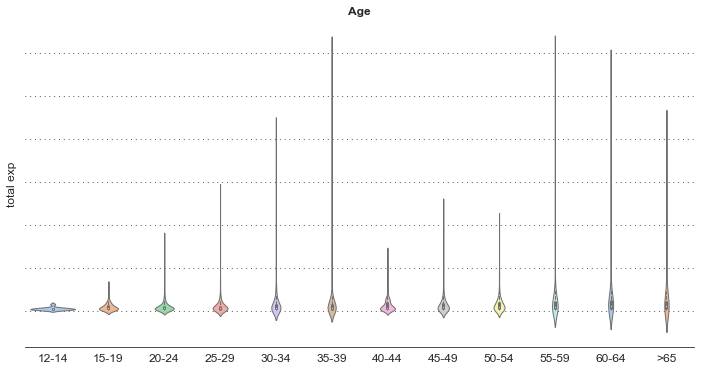

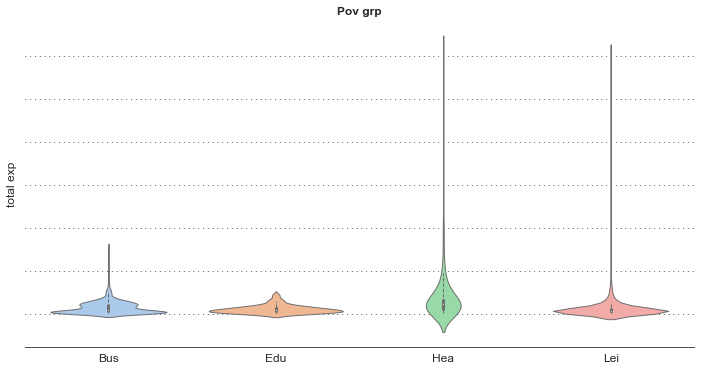

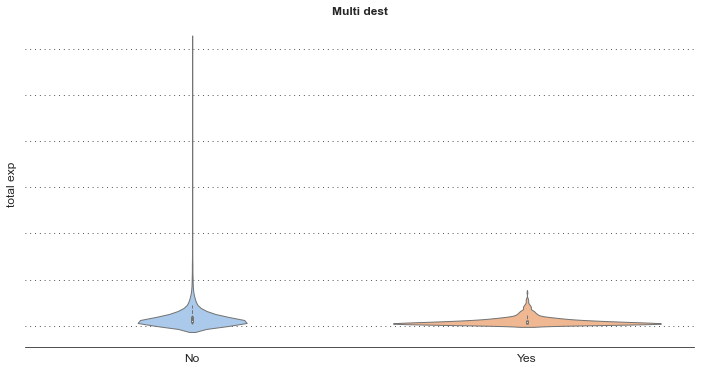

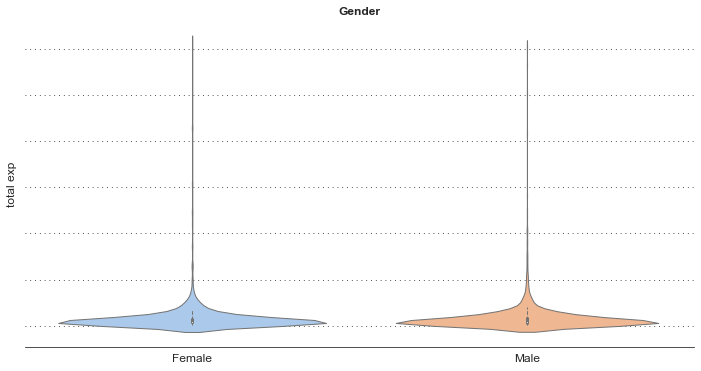

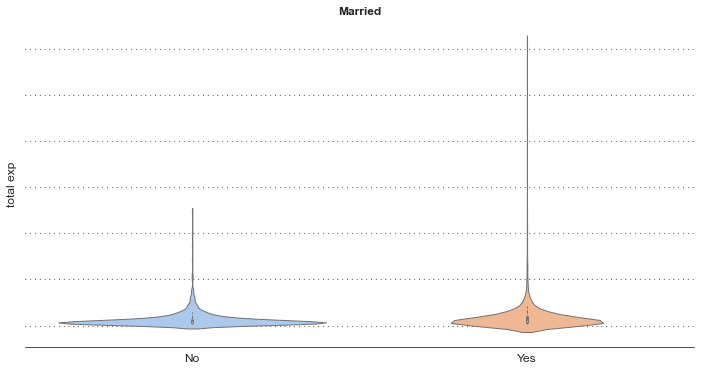

In [35]:
# total expenses by age, gender, pov_grp, multi_dest, married
for col in ['age', 'pov_grp', 'multi_dest', 'gender', 'married']: 
    plotviz(figsize=(12, 6), rows=1, cols=1, wspace=0, hspace=0, 
            var=[col], kind='vio', y='total_exp', hue=None)

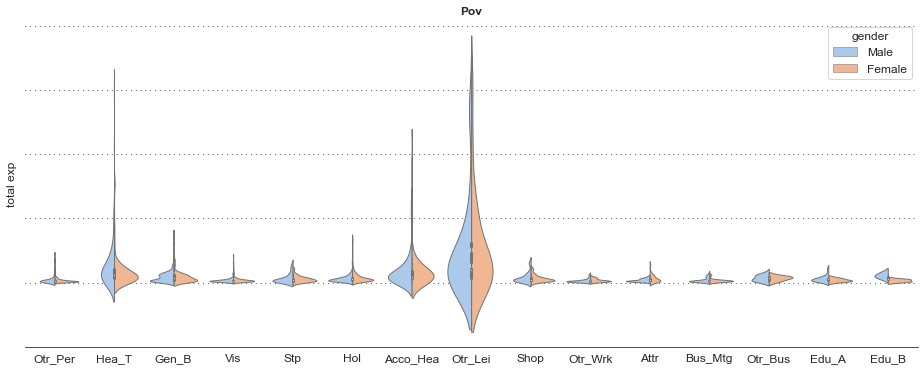

In [36]:
# total expenses by Purpose of Visit
plotviz(figsize=(16, 6), rows=1, cols=1, wspace=0, hspace=0, 
        var=['pov'], kind='vio', y='total_exp', hue='gender', hue_order=['Male', 'Female'])

<a id = 'catnonmed'></a>
## Non-Medical Expenses by Categories

Non medical is defined as the total expenses spent minus medical expenses 
- Medical expenses constitutes a large proportion of total spends 
- Differences in non-medical expenses amongst companion makeups 
- Differences in non-medical expenses amongst age, gender, married, first timers 

[back to top](#toc)

In [37]:
# create a non-medical-related expenses variable
df['nonmed_exp'] = df['total_exp'] - df['medical_exp']

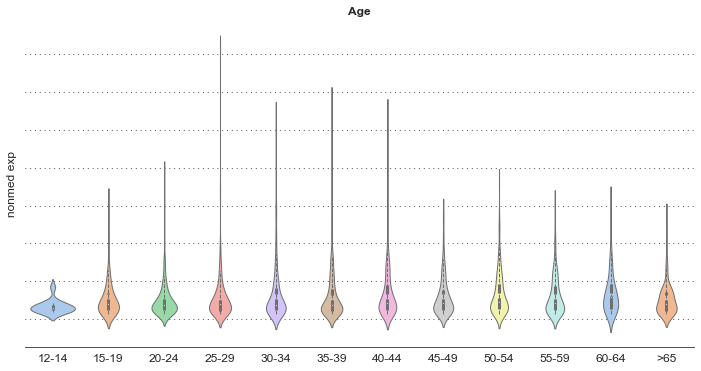

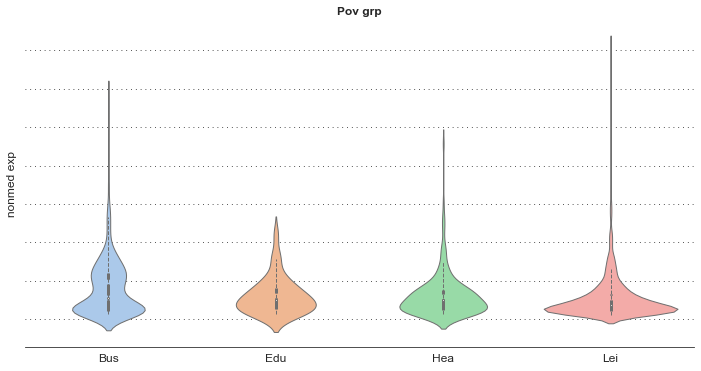

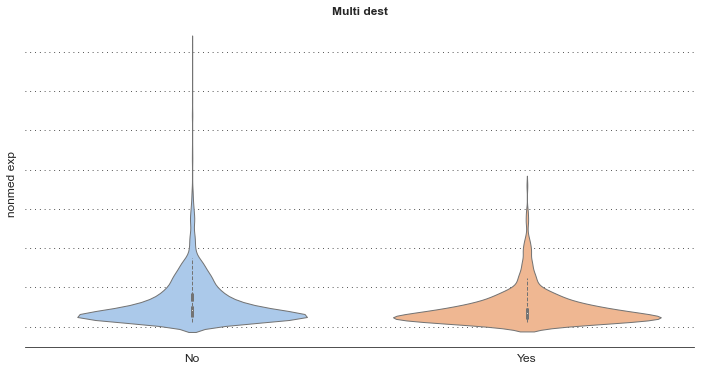

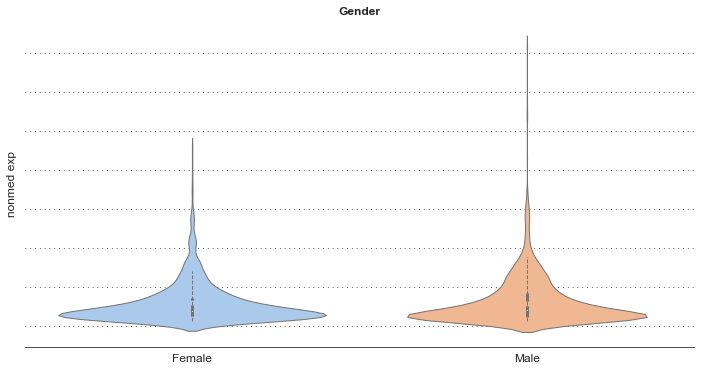

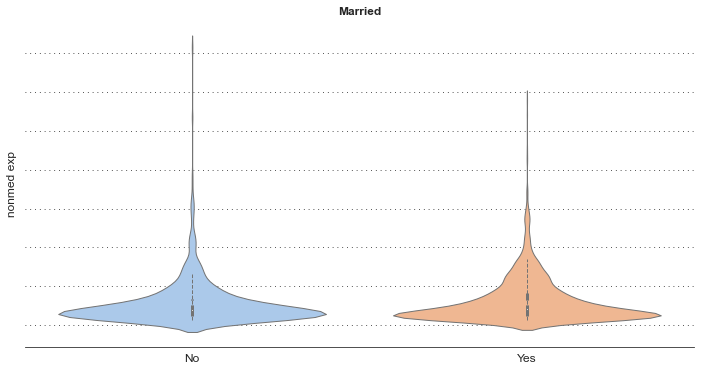

In [39]:
# non medical expenses by age, gender, pov_grp, multi_dest, married
for col in ['age', 'pov_grp', 'multi_dest', 'gender', 'married']: 
    plotviz(figsize=(12, 6), rows=1, cols=1, wspace=0, hspace=0, 
            var=[col], kind='vio', y='nonmed_exp', hue=None)

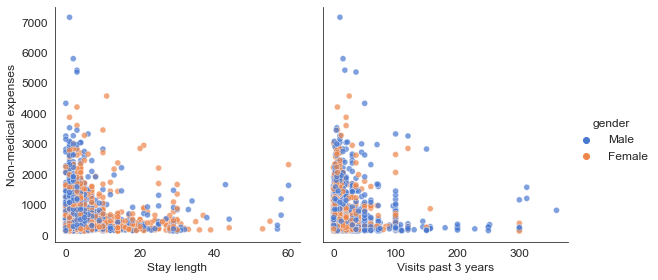

In [126]:
# non medical expenses, continuous variables
g = sns.PairGrid(df, x_vars = ['stay_length', 'visits_p3y'], 
                 y_vars = ['nonmed_exp'], 
                 hue='gender', hue_order=['Male', 'Female'],
                 diag_sharey=True, 
                 height=4, aspect=1)
g.map(sns.scatterplot, alpha=0.7)
g.add_legend()
g.axes[0, 0].yaxis.set_label_text('Non-medical expenses')
g.axes[0, 0].xaxis.set_label_text('Stay length')
g.axes[0, 1].xaxis.set_label_text('Visits past 3 years')
plt.show()

<a id = 'catstay'></a>

## Stay Length by Categories

- Differences in stay length amongst companion makeups 
- Differences in stay length amongst age, gender, married, first timers 

[back to top](#toc)


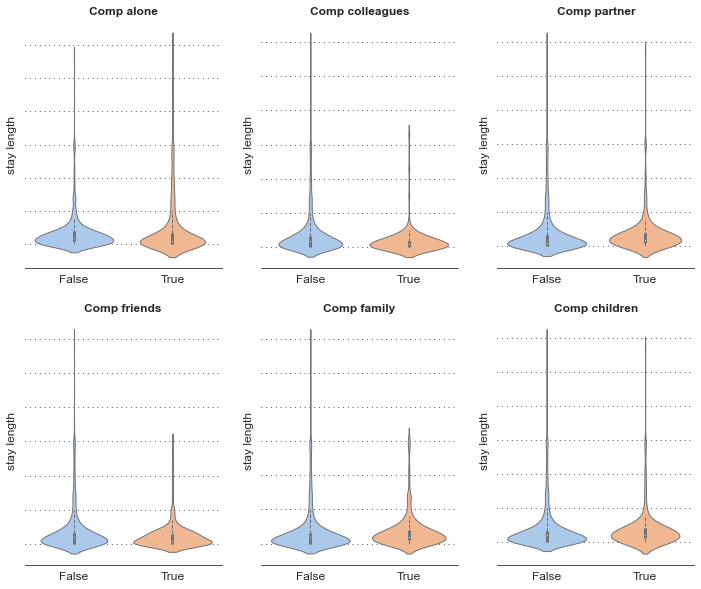

In [40]:
# stay length by companions
plotviz(figsize=(12, 10), rows=2, cols=3, wspace=0.2, hspace=0.2, 
        var=companions, kind='vio', y='stay_length')

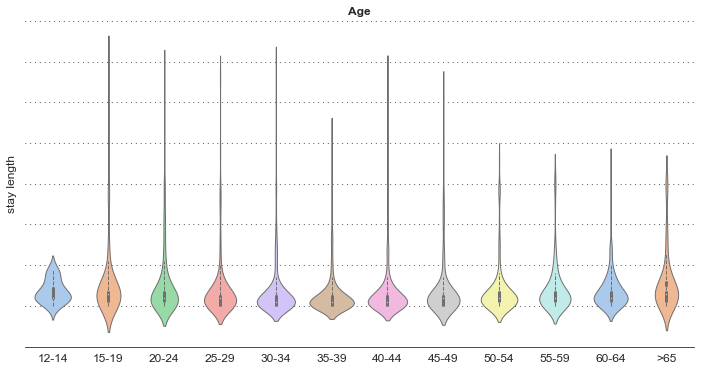

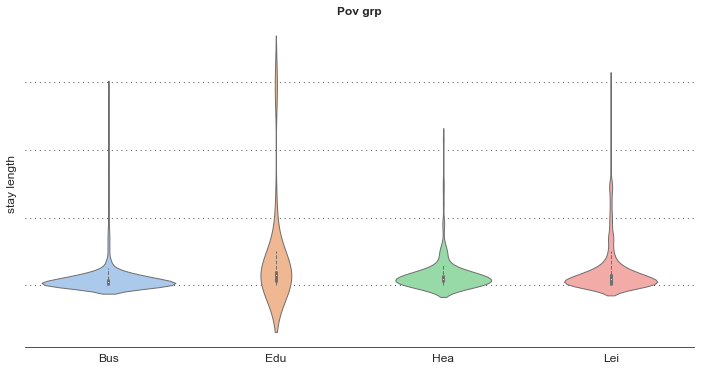

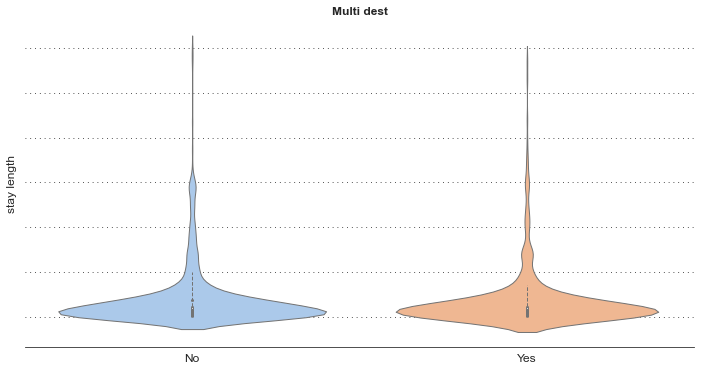

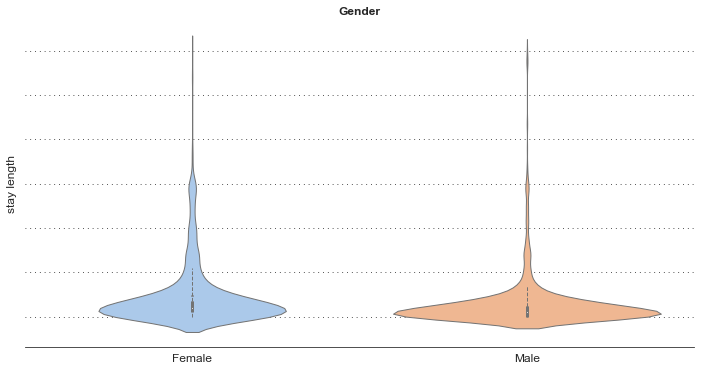

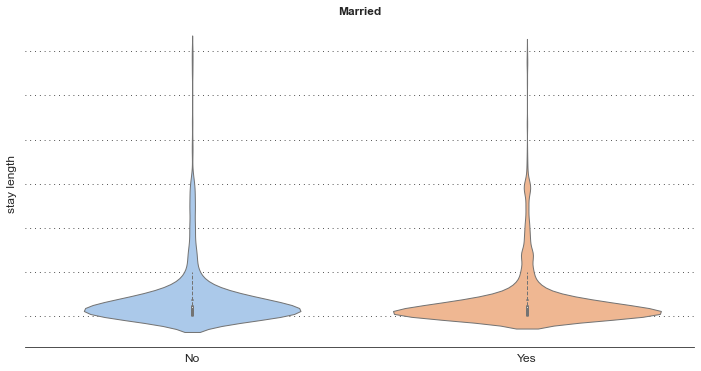

In [41]:
# stay length by age, gender, pov_grp, multi_dest, married
for col in ['age', 'pov_grp', 'multi_dest', 'gender', 'married']: 
    plotviz(figsize=(12, 6), rows=1, cols=1, wspace=0, hspace=0, 
            var=[col], kind='vio', y='stay_length', hue=None)

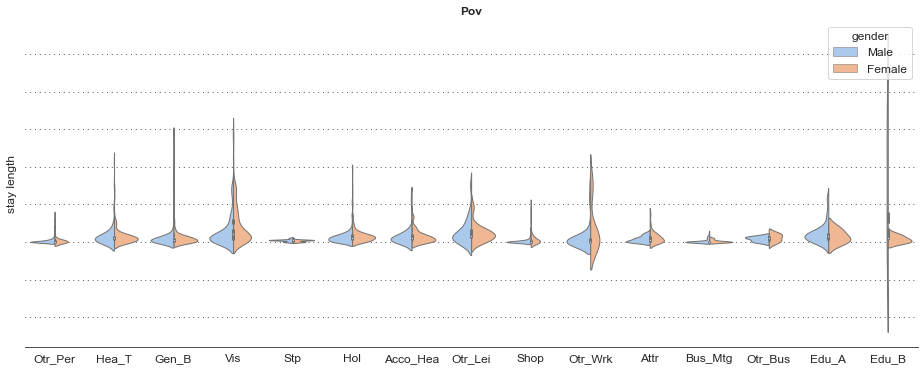

In [42]:
# stay length by Purpose of Visit
plotviz(figsize=(16, 6), rows=1, cols=1, wspace=0, hspace=0, 
        var=['pov'], kind='vio', y='stay_length', hue='gender', hue_order=['Male', 'Female'])

<a id = 'povgrpindepth'></a>
## POV Group Indepth 

Notes 
- Differences across age, gender, solo / group travellers
- Difference among spends in POV groups

[back to top](#toc)


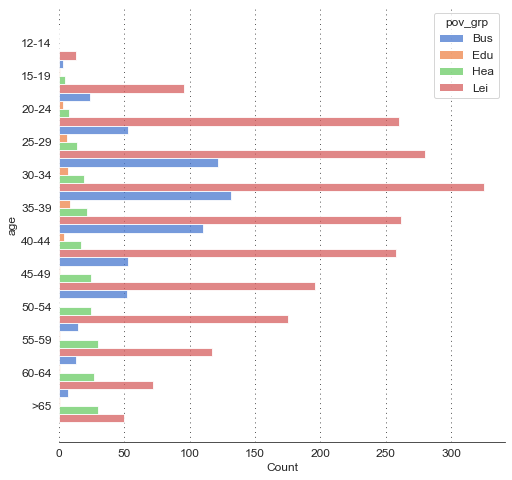

In [43]:
# pov groups across age
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

sns.histplot(data = df, y='age', hue='pov_grp', ax=ax, multiple='dodge')
ax.grid(which = 'major', axis = 'x', zorder = 0, color = 'black', linestyle = ':', dashes = (1,5))    
plt.show()

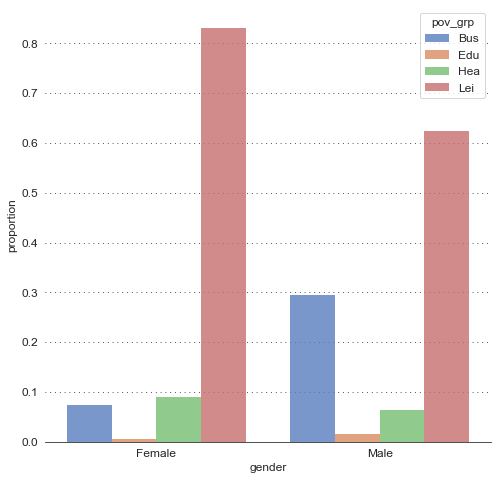

In [115]:
# pov groups across gender - proportions
df_chart = df.groupby('gender')['pov_grp'].value_counts(normalize=True).to_frame() 
df_chart.columns = ['proportion']
df_chart = df_chart.reset_index()

df_chart
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

sns.barplot(data=df_chart, x='gender', y='proportion', hue='pov_grp', ax=ax, 
            palette='muted', zorder=3, edgecolor='black', linewidth=0, alpha=0.8)
ax.grid(which = 'major', axis = 'y', zorder = 0, color = 'black', linestyle = ':', dashes = (1,5)) 
plt.show()

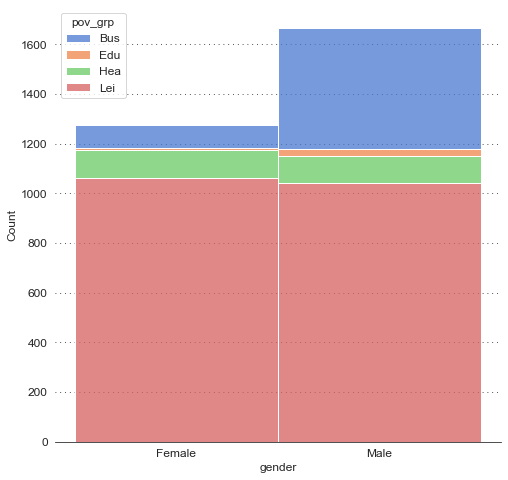

In [116]:
# pov groups across gender - raw counts
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

sns.histplot(data = df, x='gender', hue='pov_grp', stat='count', ax=ax, multiple='stack')
ax.grid(which = 'major', axis = 'y', zorder = 0, color = 'black', linestyle = ':', dashes = (1,5))    
plt.show()

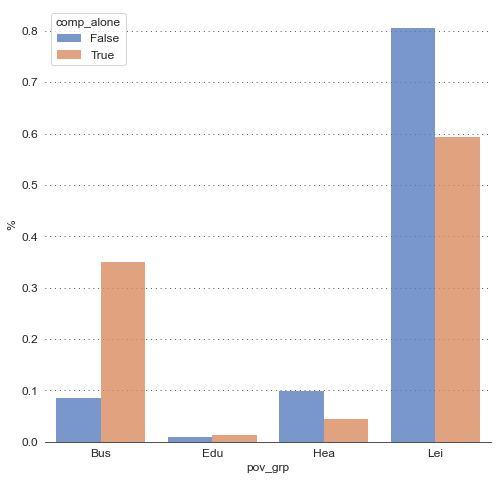

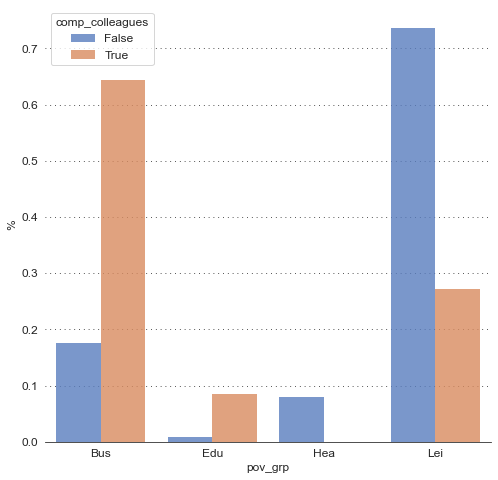

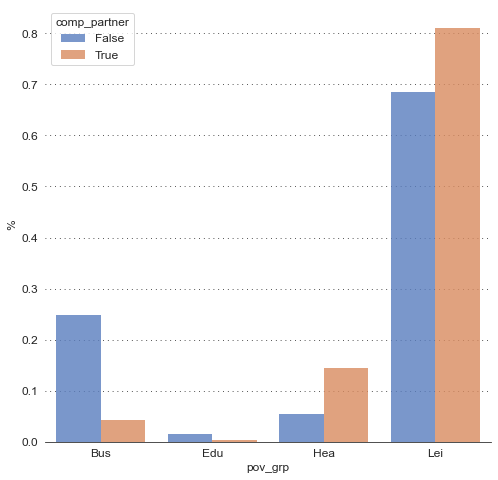

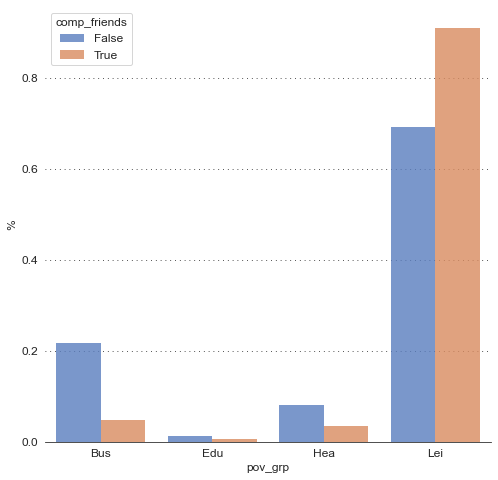

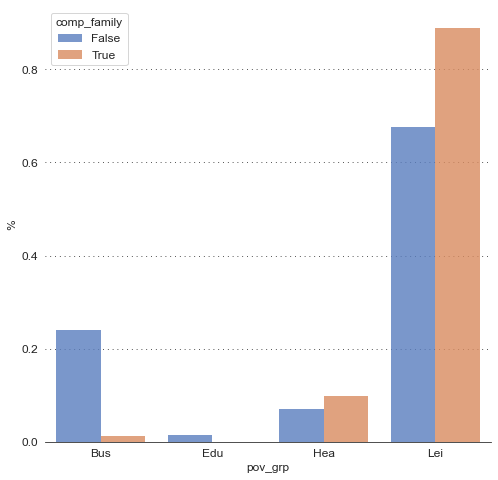

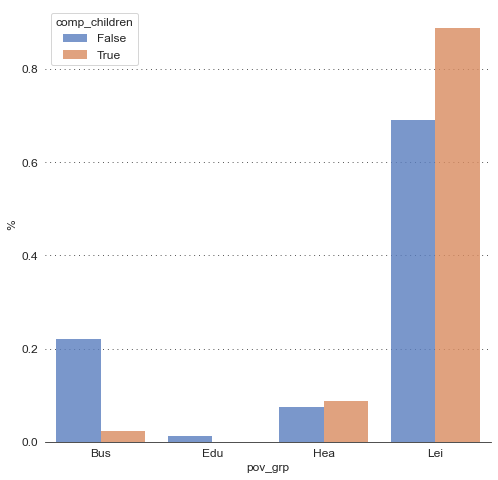

In [45]:
# pov groups across solo / group travelling
for col in companions:
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))

    for s in ['top', 'left', 'right']:
        ax.spines[s].set_visible(False)

    df_chart = df.groupby(col)['pov_grp'].value_counts(normalize=True).to_frame()
    df_chart.columns = ['%']
    df_chart = df_chart.reset_index()

    sns.barplot(data=df_chart, x='pov_grp', y='%', hue=col, ax=ax, 
                palette='muted', zorder=3, edgecolor='black', linewidth=0, alpha=0.8)
    ax.grid(which = 'major', axis = 'y', zorder = 0, color = 'black', linestyle = ':', dashes = (1,5)) 
    plt.show()

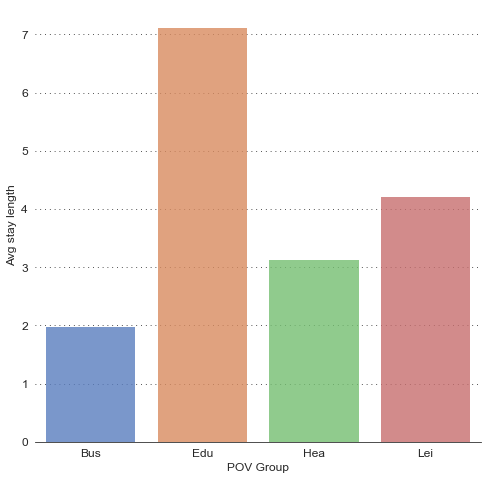

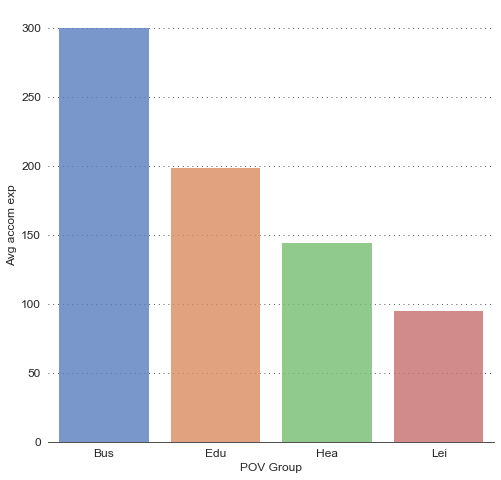

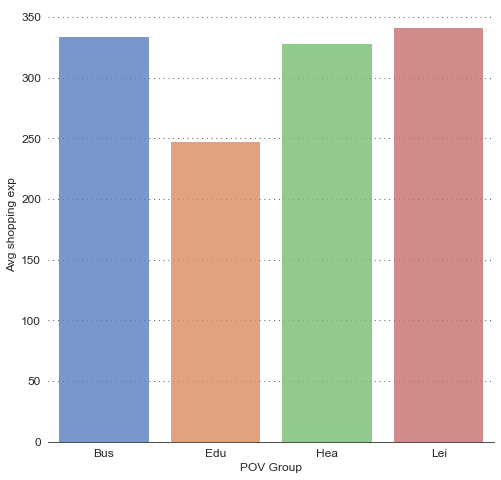

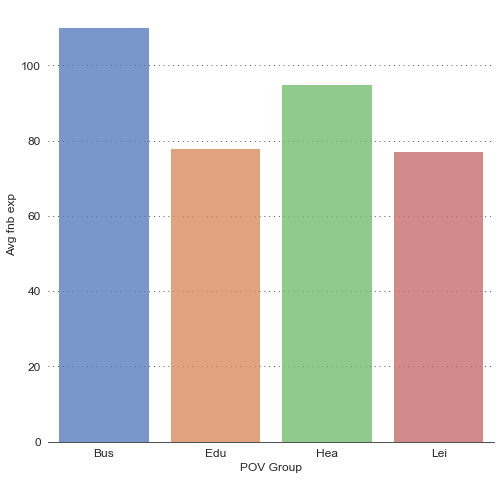

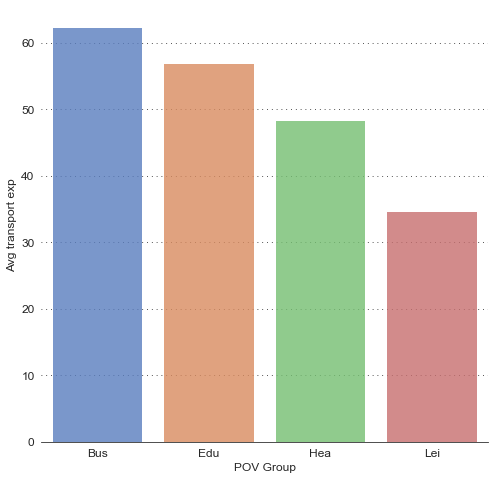

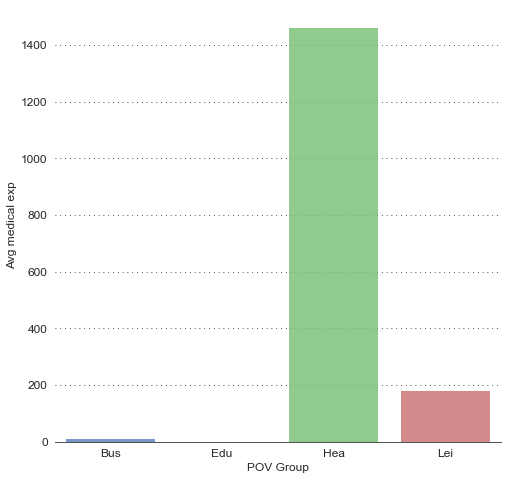

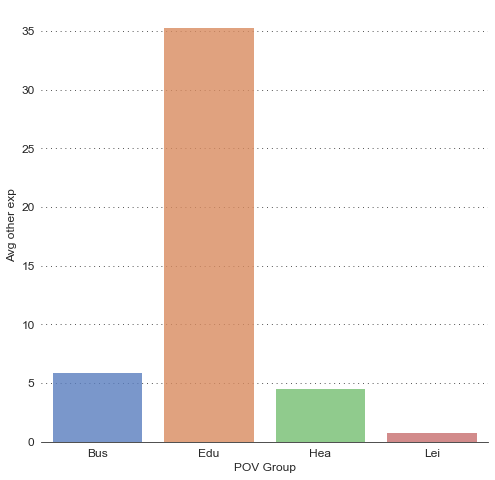

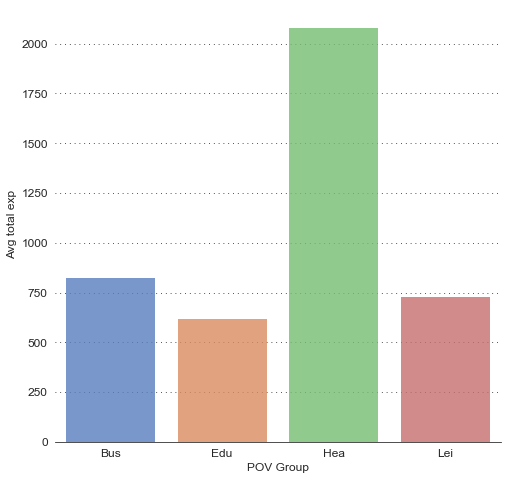

In [122]:
# expenses, stay length, split by pov group 
df_chart = df.groupby('pov_grp').agg({'stay_length': 'mean',
                                      'accom_exp': 'mean', 
                                      'shopping_exp': 'mean', 
                                      'fnb_exp': 'mean', 
                                      'transport_exp': 'mean', 
                                      'medical_exp': 'mean', 
                                      'other_exp': 'mean', 
                                      'total_exp': 'mean' })

for col in df_chart.columns: 
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))

    for s in ['top', 'left', 'right']:
        ax.spines[s].set_visible(False)

    sns.barplot(data=df_chart, x=df_chart.index, y=col, ax=ax, 
                palette='muted', zorder=3, edgecolor='black', linewidth=0, alpha=0.8)
    ax.grid(which = 'major', axis = 'y', zorder = 0, color = 'black', linestyle = ':', dashes = (1,5))
    ax.set_xlabel('POV Group')
    ax.set_ylabel(f"Avg {col.replace('_', ' ')}")
    plt.show()

<a id = 'povindepth'></a>
## POV Indepth 

Notes 
- Differences by gender, first timers, solo / group travellers etc
- Difference in expenses and stay length 

[back to top](#toc)

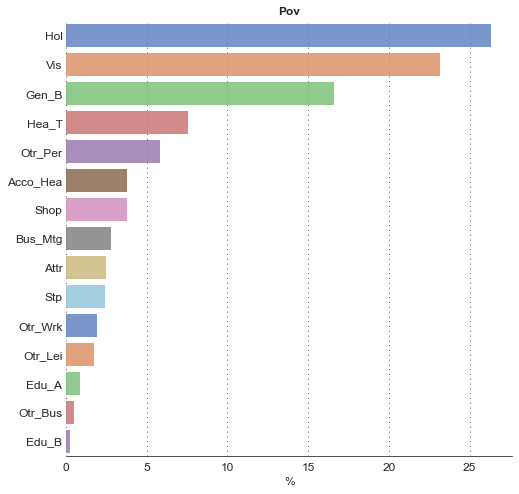

In [47]:
# general
plotviz(figsize=(8, 8), rows=1, cols=1, wspace=0.2, hspace=0.2, var=['pov'], kind='barh')

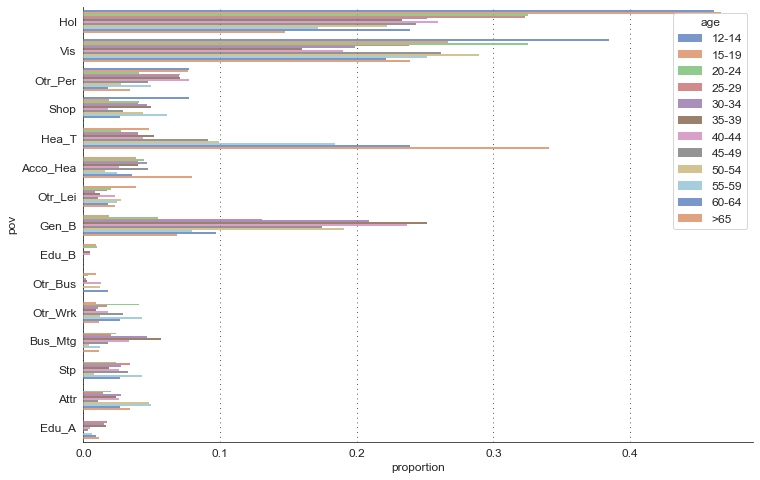

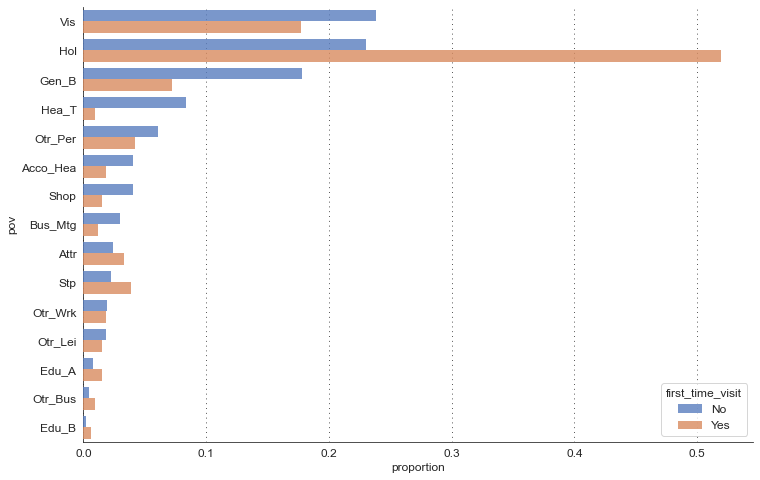

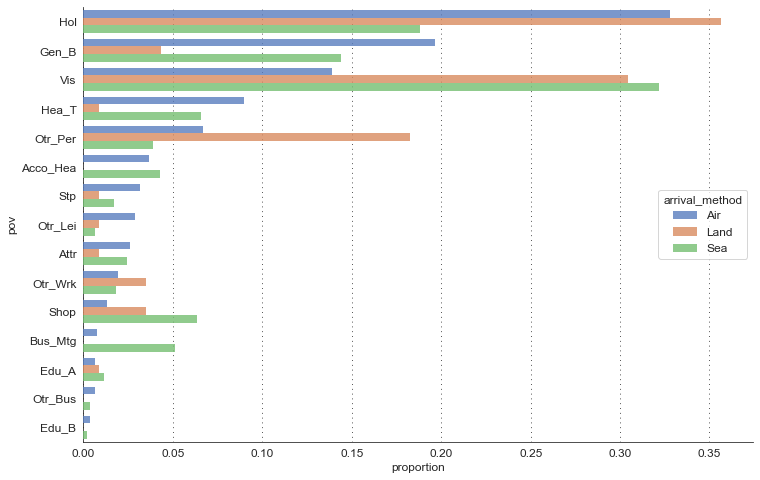

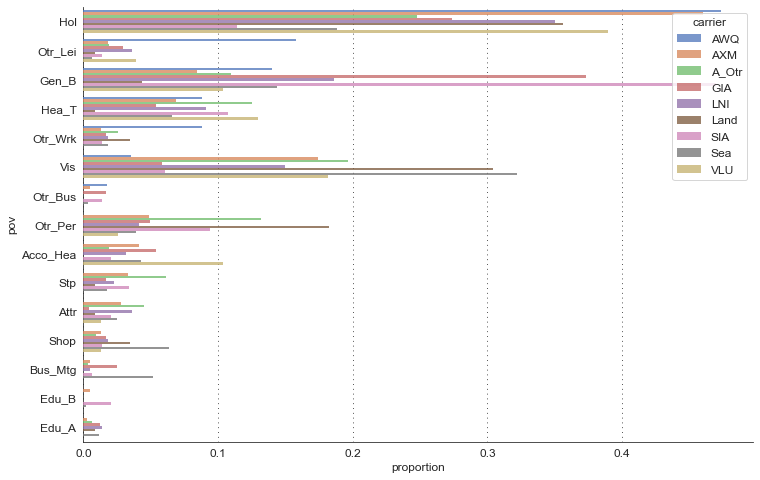

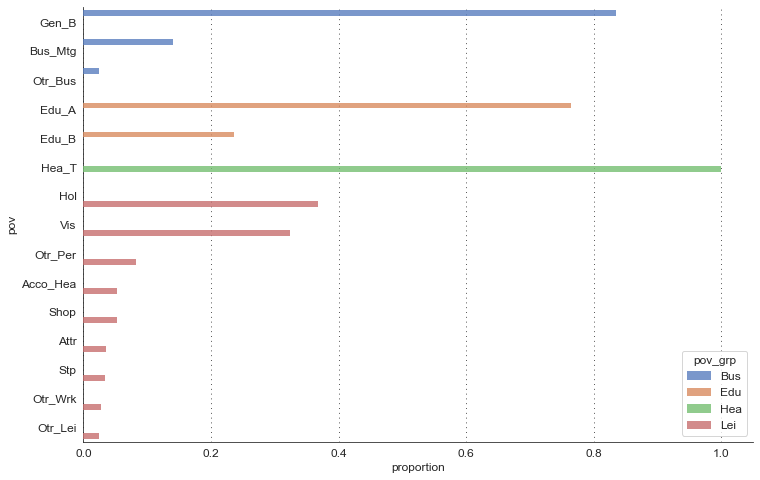

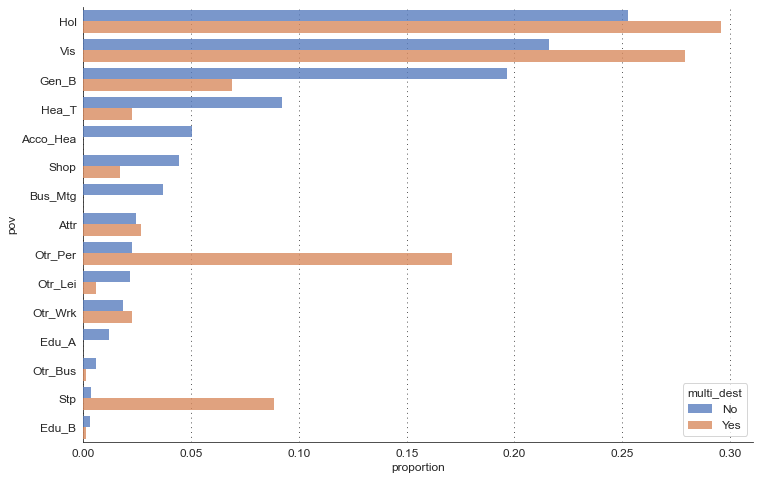

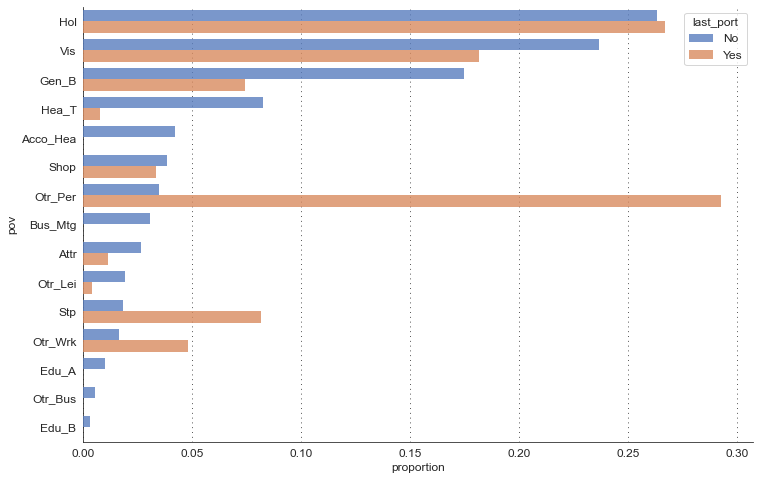

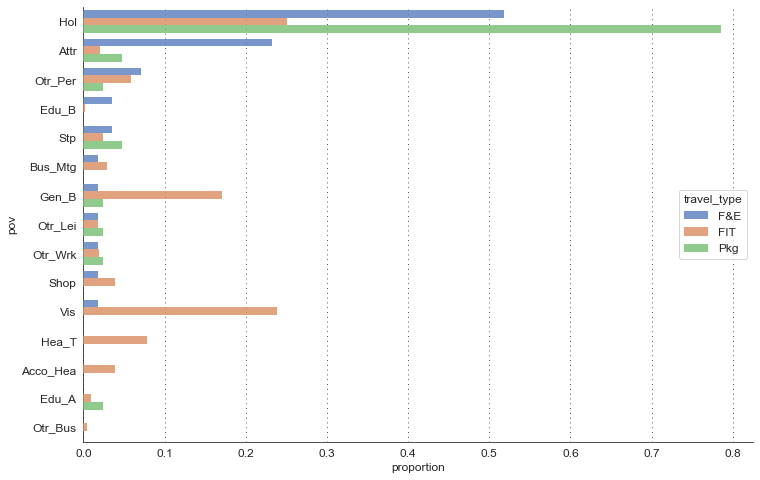

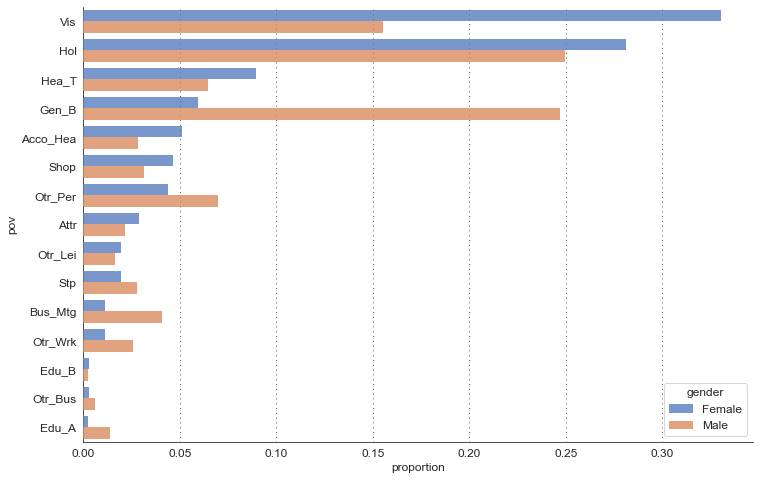

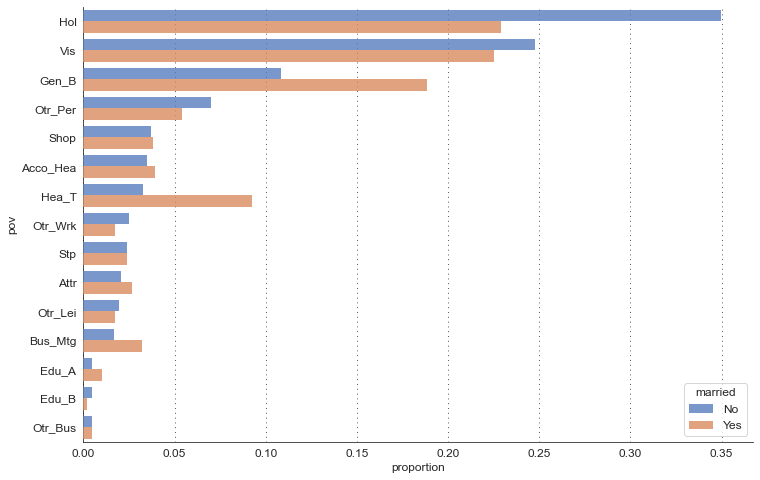

In [48]:
# demographics
for col in ['age', 'first_time_visit', 'arrival_method', 'carrier', 'pov_grp',
            'multi_dest', 'last_port', 'travel_type', 'gender', 'married']: 
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    for s in ['top', 'right']:
        ax.spines[s].set_visible(False)

    df_chart = pd.DataFrame(df.groupby(col)['pov'].value_counts(normalize=True))
    df_chart.columns = ['proportion']
    df_chart = df_chart.reset_index()
    sns.barplot(data=df_chart, y='pov', x='proportion', hue=col, ax=ax, 
                palette='muted', zorder=3, edgecolor='black', linewidth=0, alpha=0.8)
    ax.grid(which = 'major', axis = 'x', zorder = 0, color = 'black', linestyle = ':', dashes = (1,5)) 
    plt.show()

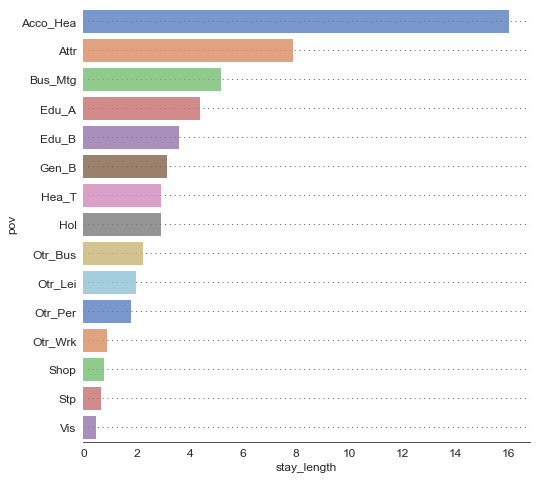

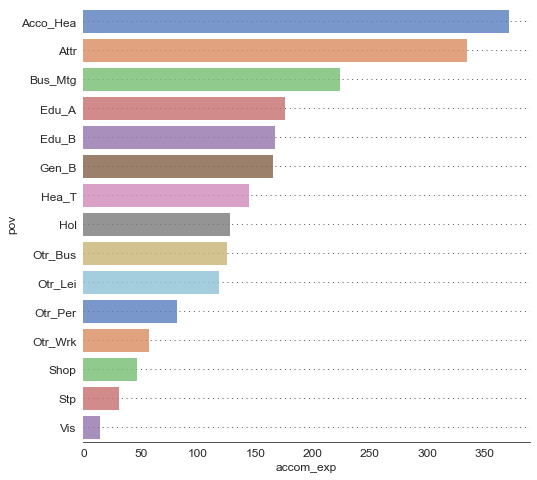

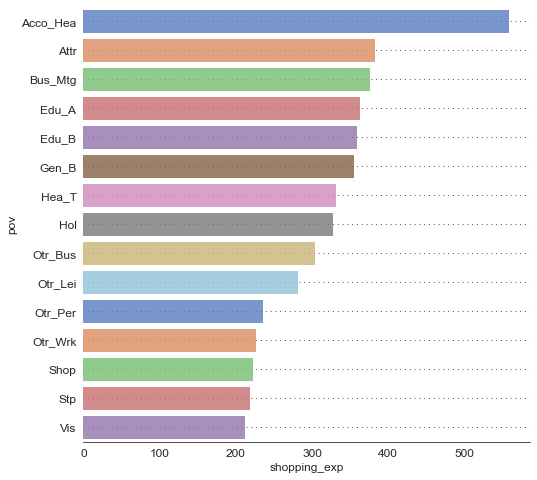

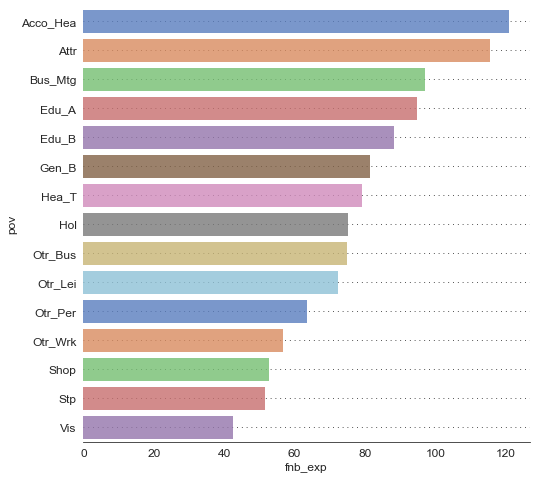

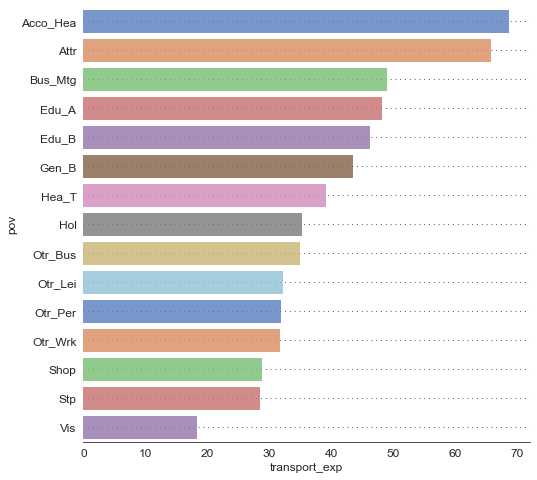

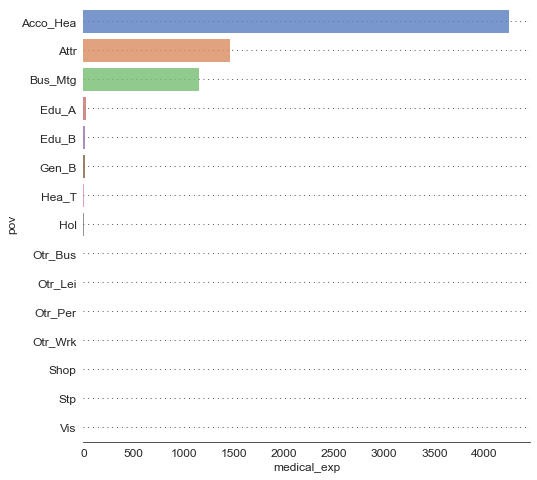

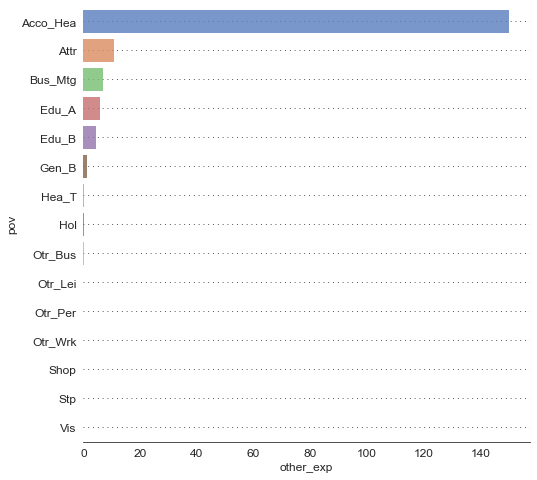

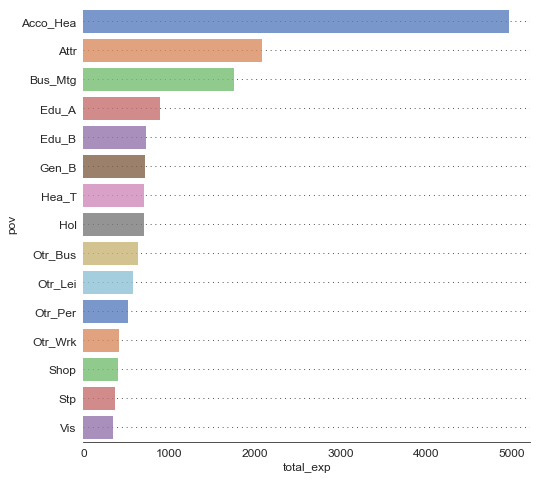

In [49]:
# expenses split by pov  
df_chart = df.groupby('pov').agg({'stay_length': 'mean',
                                  'accom_exp': 'mean', 
                                  'shopping_exp': 'mean', 
                                  'fnb_exp': 'mean', 
                                  'transport_exp': 'mean', 
                                  'medical_exp': 'mean', 
                                  'other_exp': 'mean', 
                                  'total_exp': 'mean' })

for col in df_chart.columns: 
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))

    for s in ['top', 'left', 'right']:
        ax.spines[s].set_visible(False)

    sns.barplot(data=df_chart.sort_values(by=col, ascending=False), y=df_chart.index, x=col, ax=ax, 
                palette='muted', zorder=3, edgecolor='black', linewidth=0, alpha=0.8)
    ax.grid(which = 'major', axis = 'y', zorder = 0, color = 'black', linestyle = ':', dashes = (1,5)) 
    plt.show()

<a id = 'cattime'></a>
## Changes through Time - Categorical

Notes 
- Differences in POV and POV groups
- Differences in gender, age, marital status
- Differences in other demographics
- Difference in companionship group types
- Difference in expenses

[back to top](#toc)

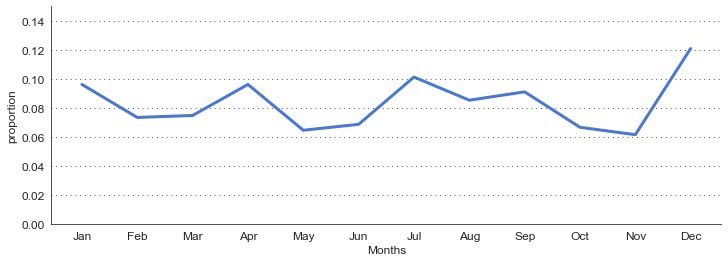

In [50]:
# December, July seem to be stronger months 
# Assumption: data was randomly sampled from the population and therefore representative 
df_mth = df['mth'].value_counts(normalize=True).to_frame().sort_index()

fig, ax = plt.subplots(1, 1, figsize=(12, 4))
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
    
sns.lineplot(data=df_mth, x=df_mth.index, y='mth', dashes=False, ax=ax,
             linewidth=3, linestyle='-')
ax.set_ylim(0, 0.15)
ax.set_ylabel('proportion')
ax.set_xlabel('Months')
ax.grid(which = 'major', axis = 'y', zorder = 0, color = 'black', linestyle = ':', dashes = (1,5)) 
plt.show()

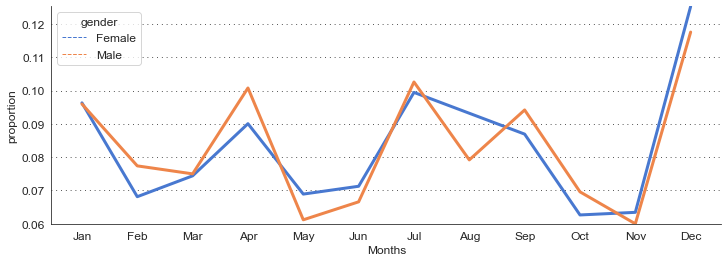

In [151]:
# split by age
# df_mth = df.groupby('gender')['mth'].value_counts(normalize=True).to_frame().sort_index()
# df_mth.columns = ['proportion']
# df_mth = df_mth.reset_index()

# df_mth
# fig, ax = plt.subplots(1, 1, figsize=(12, 4))
# for s in ['top', 'right']:
#     ax.spines[s].set_visible(False)
    
# sns.lineplot(data=df_mth, x='mth', y='proportion', hue='gender', dashes=False, ax=ax,
#              linewidth=3, linestyle='-')
# ax.set_ylim(df_mth['proportion'].min(), df_mth['proportion'].max())
# ax.set_ylabel('proportion')
# ax.set_xlabel('Months')
# ax.grid(which = 'major', axis = 'y', zorder = 0, color = 'black', linestyle = ':', dashes = (1,5)) 
# plt.show()

#### Total spends across time

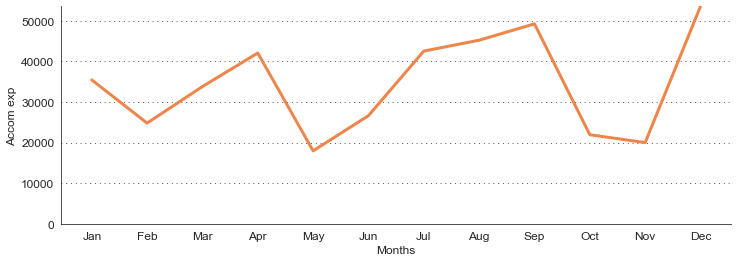

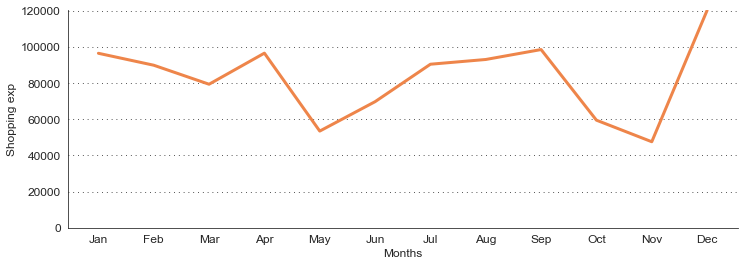

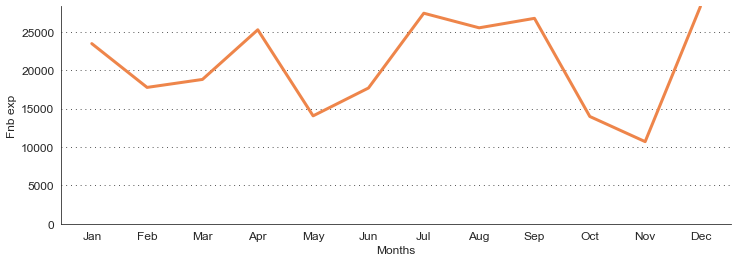

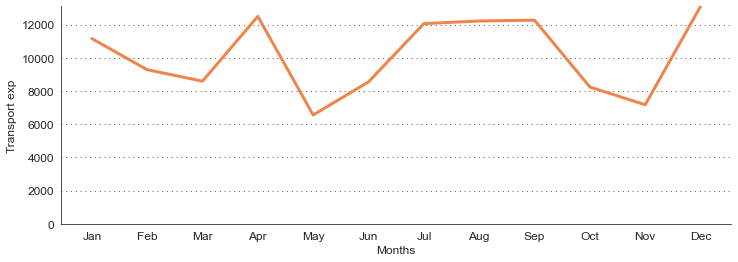

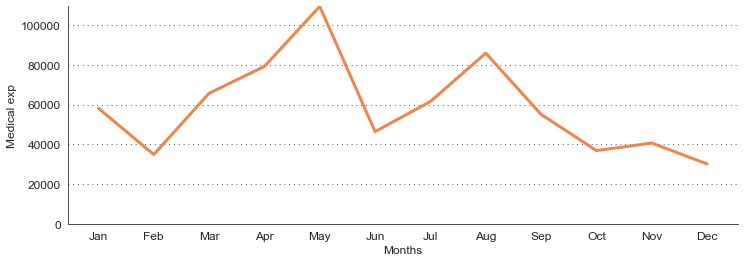

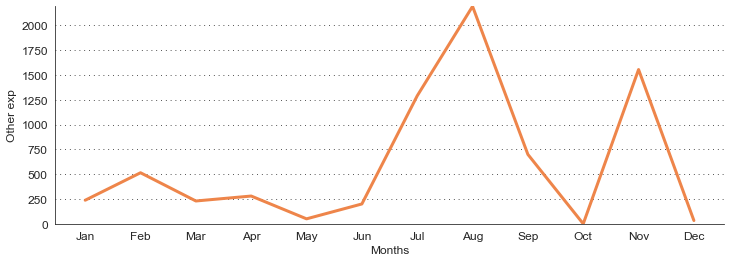

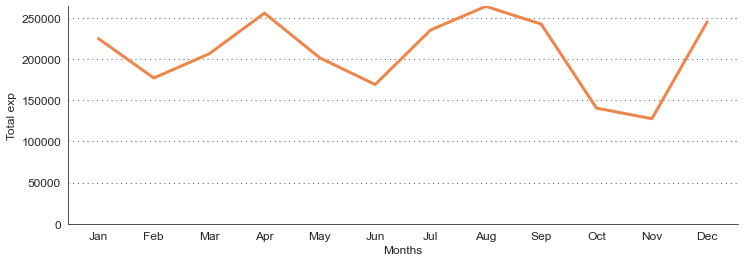

In [100]:
df_mth = df.groupby('mth').agg({'accom_exp': 'sum', 
                                'shopping_exp': 'sum', 
                                'fnb_exp': 'sum', 
                                'transport_exp': 'sum', 
                                'medical_exp': 'sum', 
                                'other_exp': 'sum', 
                                'total_exp': 'sum'})
for col in df_mth.columns.to_list():
    fig, ax = plt.subplots(1, 1, figsize=(12, 4))
    for s in ['top', 'right']:
        ax.spines[s].set_visible(False)

    sns.lineplot(data=df_mth, x=df_mth.index, y=col, dashes=False, ax=ax,
                 linewidth=3, linestyle='-')
    ax.set_ylim(0, df_mth[col].max())
    ax.set_ylabel(col.replace('_', ' ').capitalize())
    ax.set_xlabel('Months')
    ax.grid(which = 'major', axis = 'y', zorder = 0, color = 'black', linestyle = ':', dashes = (1,5)) 
    plt.show()

In [52]:
#     fig, ax = plt.subplots(1, 1, figsize=(12, 4))
#     for s in ['top', 'right']:
#         ax.spines[s].set_visible(False)

#     sns.lineplot(data=df_mth, x=df_mth.index, y='fnb_exp', dashes=False, ax=ax,
#                  linewidth=3, linestyle='-', color=col_green)
#     ax.set_ylim(0, df_mth['fnb_exp'].max())
#     ax.set_ylabel(f'Tot $: FNB')
#     ax.set_xlabel('Months')
#     ax.grid(which = 'major', axis = 'y', zorder = 0, color = 'black', linestyle = ':', dashes = (1,5)) 
#     plt.show()

#### POV groups

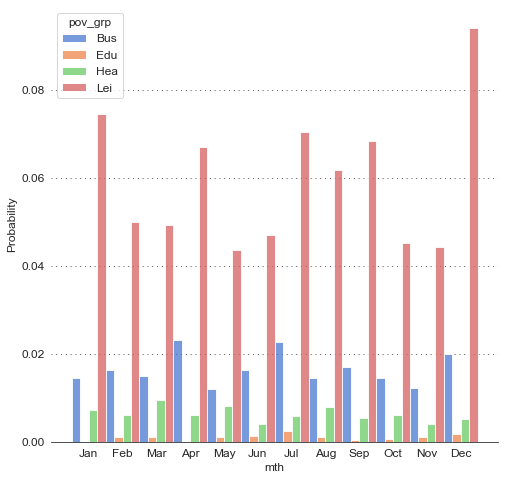

In [53]:
# proportion of POV groups over the months
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

sns.histplot(data = df, x='mth', hue='pov_grp',  
             bins=12, stat='probability', ax=ax, multiple='dodge')
ax.grid(which = 'major', axis = 'y', zorder = 0, color = 'black', linestyle = ':', dashes = (1,5))    
plt.show()

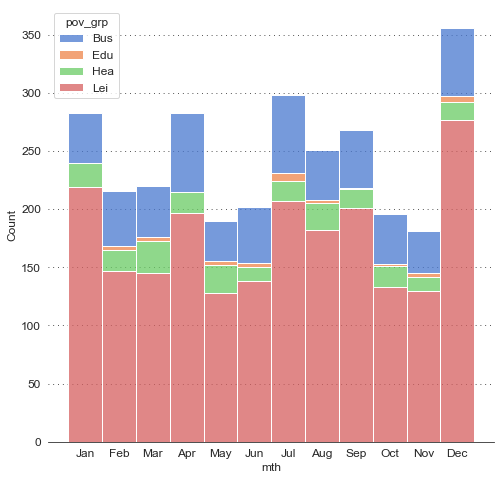

In [54]:
# counts of POV groups over the months
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

sns.histplot(data = df, x='mth', hue='pov_grp',  
             bins=12, stat='count', ax=ax, multiple='stack')
ax.grid(which = 'major', axis = 'y', zorder = 0, color = 'black', linestyle = ':', dashes = (1,5))    
plt.show()

#### POVs

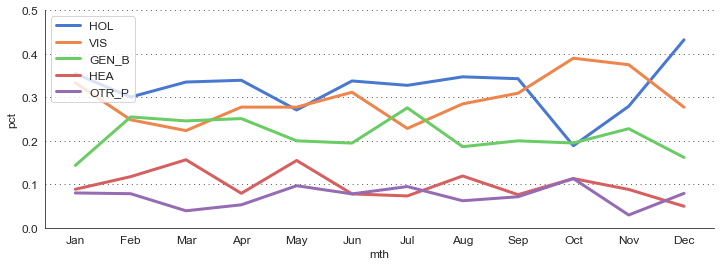

In [55]:
# 5 most common povs 
pov5 = df['pov'].value_counts().nlargest(5).index.tolist()

df_stack_povgrp = df[df['pov'].isin(pov5)].groupby('mth')['pov'].value_counts(normalize=True).to_frame()
df_stack_povgrp.columns = ['pct']
df_stack_povgrp = df_stack_povgrp.reset_index()
df_stack_povgrp

fig, ax = plt.subplots(1, 1, figsize=(12, 4))
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
    
sns.lineplot(data=df_stack_povgrp, x='mth', y='pct', hue='pov', dashes=False, ax=ax,
             linewidth=3, linestyle='-')
ax.set_ylim(0, 0.5)
ax.legend(loc='upper left', labels=['HOL', 'VIS', 'GEN_B', 'HEA', 'OTR_P'])
ax.grid(which = 'major', axis = 'y', zorder = 0, color = 'black', linestyle = ':', dashes = (1,5))    
plt.show()

#### Age

In [56]:
# function to apply to age groups
def age_grouping(x): 
    if x == '12-14' or x == '15-19' or x == '20-24' or x == '25-29': 
        return 'low'
    elif x == '30-34' or x == '35-39' or x == '40-44' or x == '45-49': 
        return 'mid'
    else: 
        return 'high'

In [57]:
# changes to age groups > generalize to low mid high
df['age_grp'] = df['age']
df['age_grp'] = df['age_grp'].apply(age_grouping)

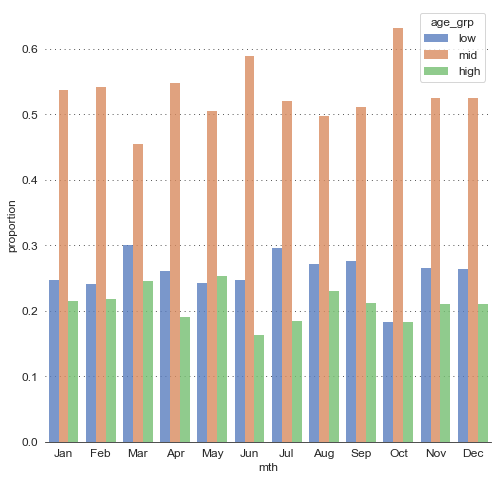

In [58]:
# age group changes 
fig, ax = plt.subplots(1, 1, figsize=(8, 8))    
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

df_chart = df.groupby('mth')['age_grp'].value_counts(normalize=True).to_frame()
df_chart.columns = ['proportion']
df_chart = df_chart.reset_index()

sns.barplot(data=df_chart, y='proportion', x='mth', hue='age_grp', hue_order=['low', 'mid', 'high'], 
            ax=ax, palette='muted', zorder=3, edgecolor='black', linewidth=0, alpha=0.8)
ax.grid(which = 'major', axis = 'y', zorder = 0, color = 'black', linestyle = ':', dashes = (1,5))    
plt.show()

#### Marriage

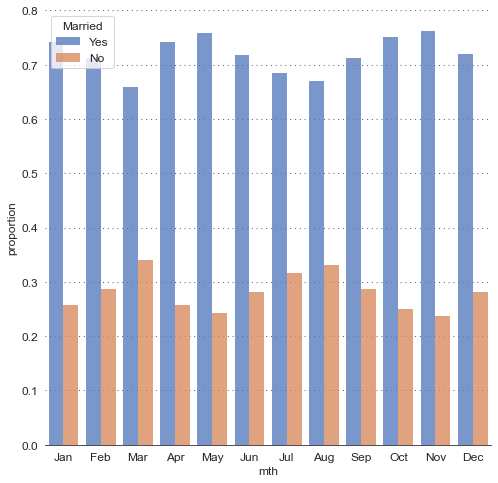

In [59]:
# marital status changes
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

df_chart = df.groupby('mth')['married'].value_counts(normalize=True).to_frame()
df_chart.columns = ['proportion']
df_chart = df_chart.reset_index()

sns.barplot(data=df_chart, y='proportion', x='mth', hue='married', hue_order=['Yes', 'No'], 
            ax=ax, palette='muted', zorder=3, edgecolor='black', linewidth=0, alpha=0.8)
ax.legend(loc='upper left', title='Married')
ax.grid(which = 'major', axis = 'y', zorder = 0, color = 'black', linestyle = ':', dashes = (1,5))    
plt.show()

#### Gender

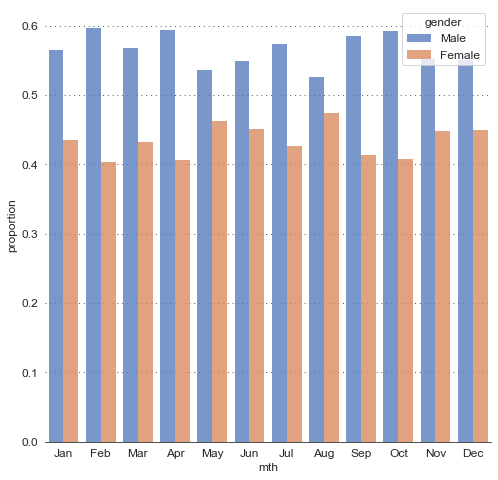

In [60]:
# gender changes
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

df_chart = df.groupby('mth')['gender'].value_counts(normalize=True).to_frame()
df_chart.columns = ['proportion']
df_chart = df_chart.reset_index()

sns.barplot(data=df_chart, y='proportion', x='mth', hue='gender', hue_order=['Male', 'Female'], 
            ax=ax, palette='muted', zorder=3, edgecolor='black', linewidth=0, alpha=0.8)
ax.grid(which = 'major', axis = 'y', zorder = 0, color = 'black', linestyle = ':', dashes = (1,5))    
plt.show()

#### Other Demographics

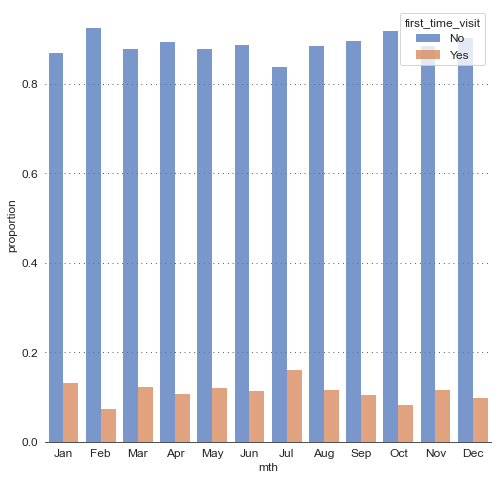

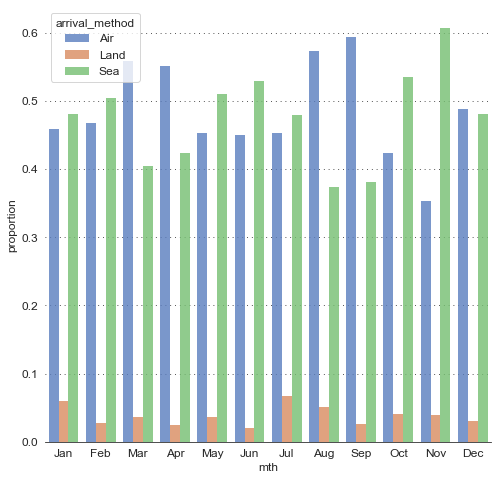

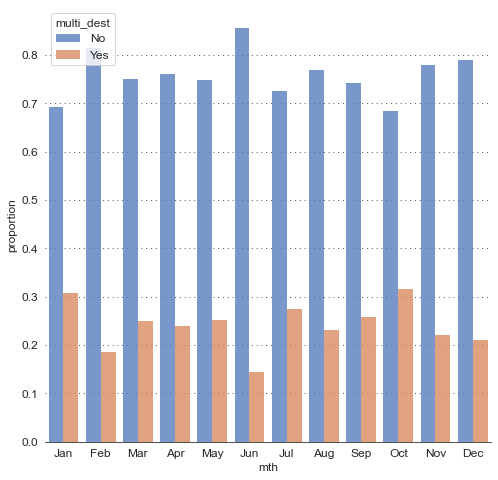

In [61]:
# other general demographic changes > first timer, arrival method, multi dest
for col in ['first_time_visit', 'arrival_method', 'multi_dest']: 
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    
    for s in ['top', 'left', 'right']:
        ax.spines[s].set_visible(False)
        
    df_chart = df.groupby('mth')[col].value_counts(normalize=True).to_frame()
    df_chart.columns = ['proportion']
    df_chart = df_chart.reset_index()
    
    sns.barplot(data=df_chart, y='proportion', x='mth', hue=col, 
                ax=ax, palette='muted', zorder=3, edgecolor='black', linewidth=0, alpha=0.8)
    ax.grid(which = 'major', axis = 'y', zorder = 0, color = 'black', linestyle = ':', dashes = (1,5))    
    plt.show()

#### Companions

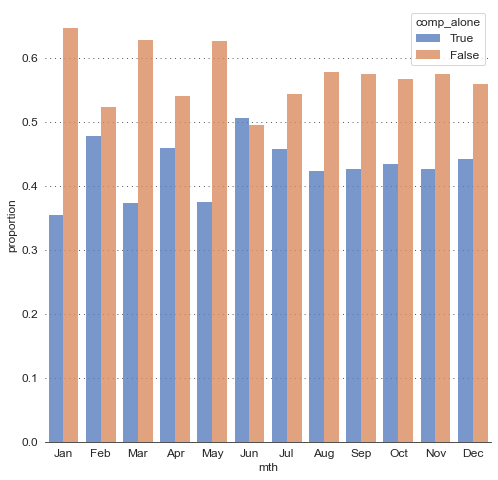

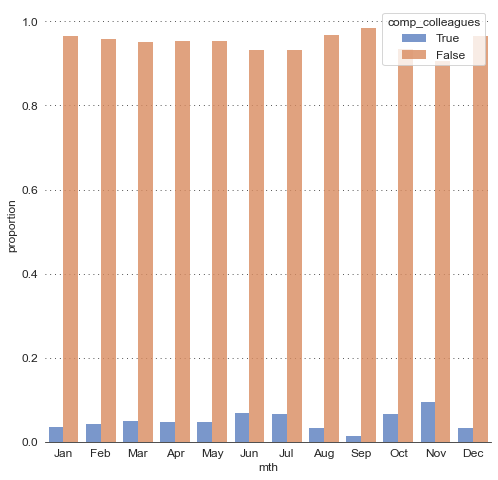

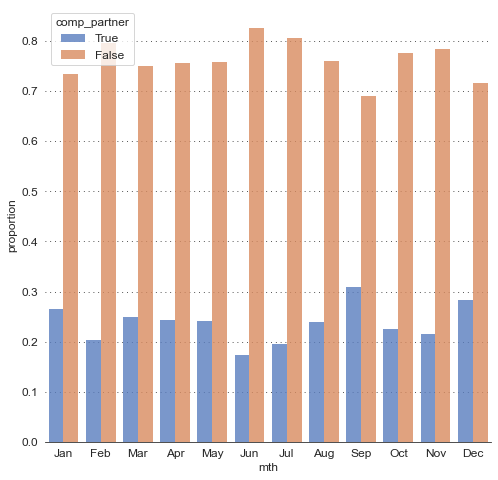

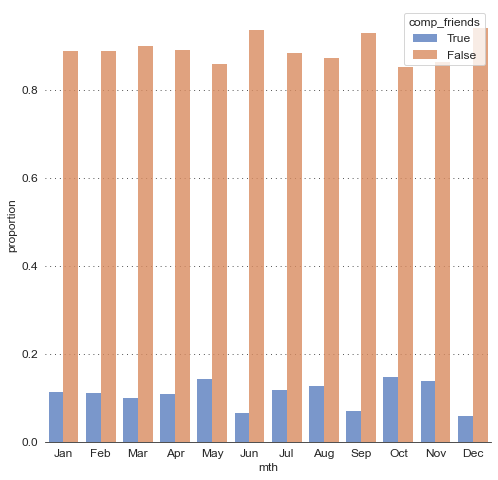

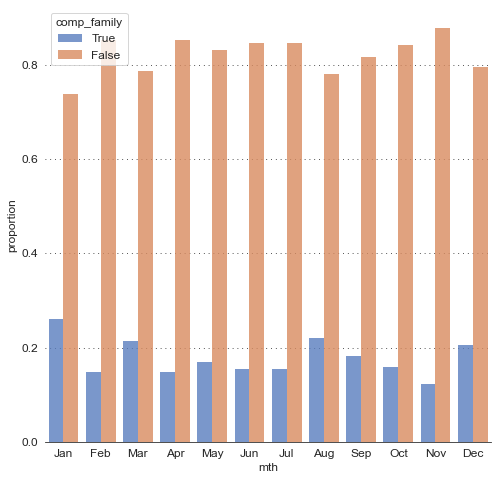

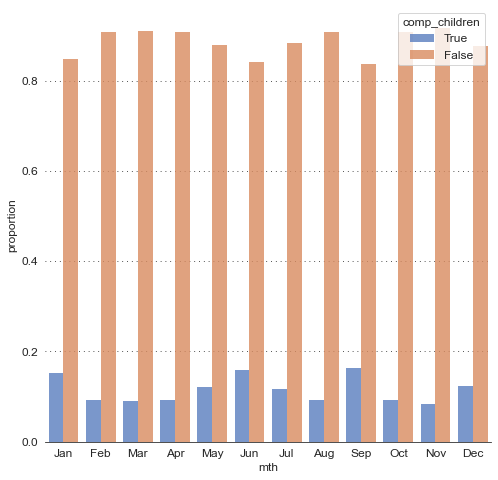

In [62]:
# companion group changes
for col in companions: 
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    
    for s in ['top', 'left', 'right']:
        ax.spines[s].set_visible(False)
        
    df_chart = df.groupby('mth')[col].value_counts(normalize=True).to_frame()
    df_chart.columns = ['proportion']
    df_chart = df_chart.reset_index()
    
    sns.barplot(data=df_chart, y='proportion', x='mth', hue=col, hue_order=[True, False], 
                ax=ax, palette='muted', zorder=3, edgecolor='black', linewidth=0, alpha=0.8)
    ax.grid(which = 'major', axis = 'y', zorder = 0, color = 'black', linestyle = ':', dashes = (1,5))    
    plt.show()

<a id = 'conttime'></a>
## Changes through Time - Continuous

Notes 
- Compute mean and median changes

[back to top](#toc)


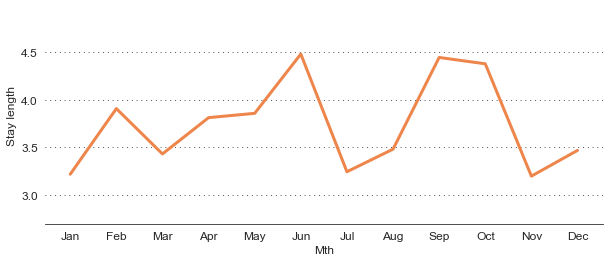

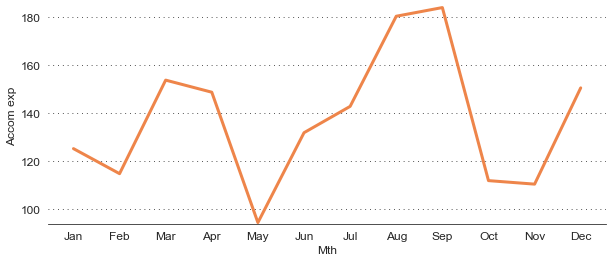

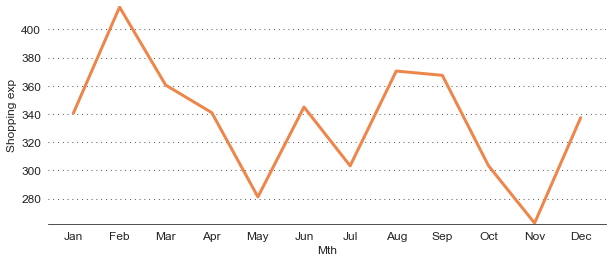

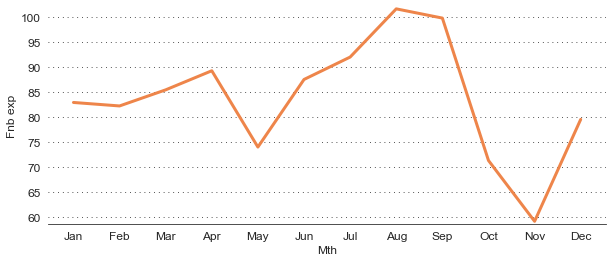

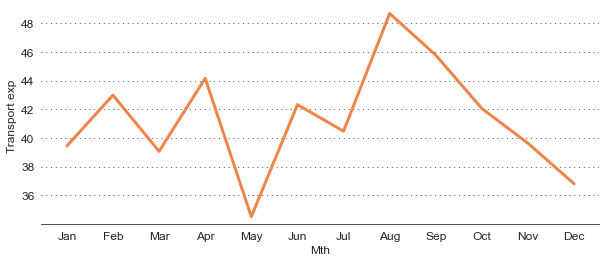

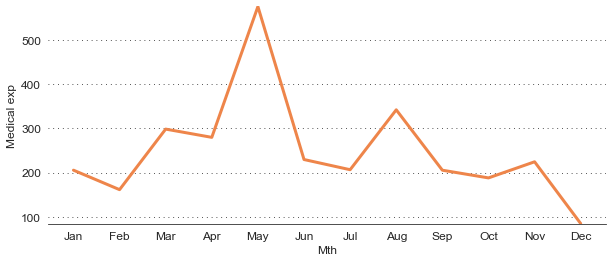

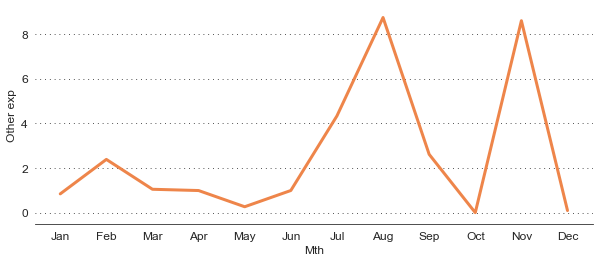

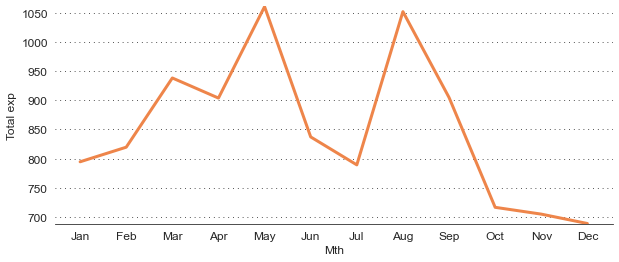

In [98]:
# mean changes
df_chart = df.groupby('mth').agg({ 'stay_length': 'mean',
                                   'accom_exp': 'mean', 
                                   'shopping_exp': 'mean', 
                                   'fnb_exp': 'mean', 
                                   'transport_exp': 'mean', 
                                   'medical_exp': 'mean', 
                                   'other_exp': 'mean', 
                                   'total_exp': 'mean' })
# num changes
for col in df_chart.columns.values:
    fig, ax = plt.subplots(1, 1, figsize=(10, 4))

    for s in ['top', 'left', 'right']:
        ax.spines[s].set_visible(False)

    sns.lineplot(data=df_chart, x=df_chart.index, y=col, dashes=False, ax=ax,
                 linewidth=3, linestyle='solid', color = col_orange)
    ax.grid(which = 'major', axis = 'y', zorder = 0, color = 'black', linestyle = ':', dashes = (1,5))
    ax.set_ylabel(col.replace('_', ' ').capitalize())
    ax.set_xlabel('Mth')
    ax.set_ylim(df_chart[col].min() - 0.5, df_chart[col].max() + 0.5)
    plt.show()

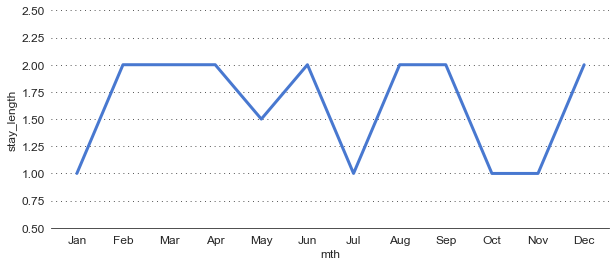

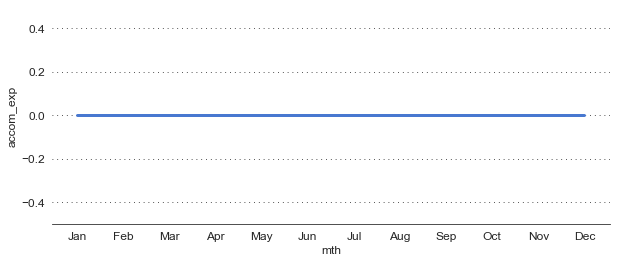

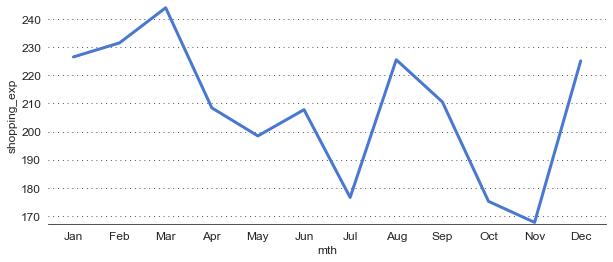

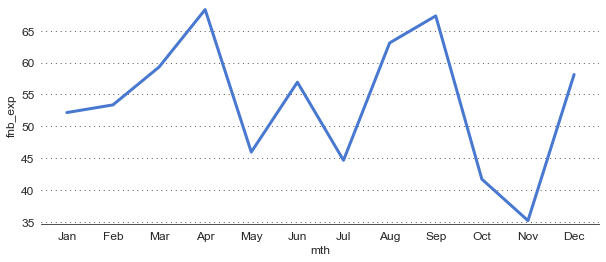

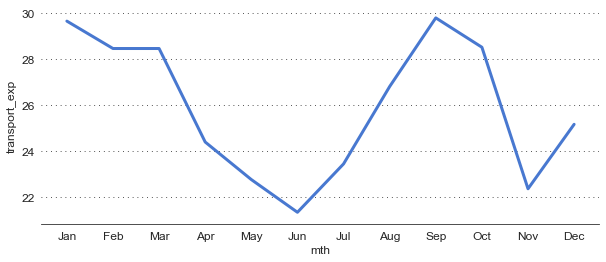

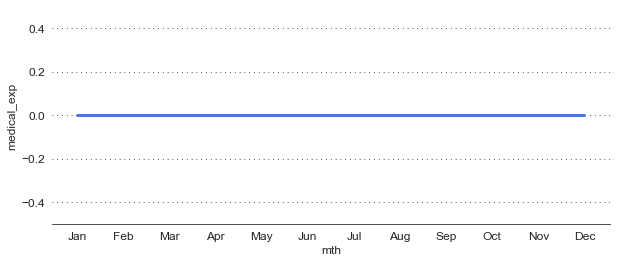

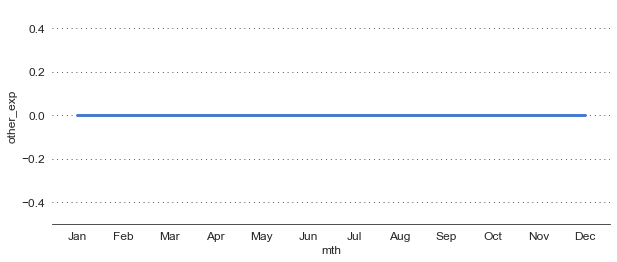

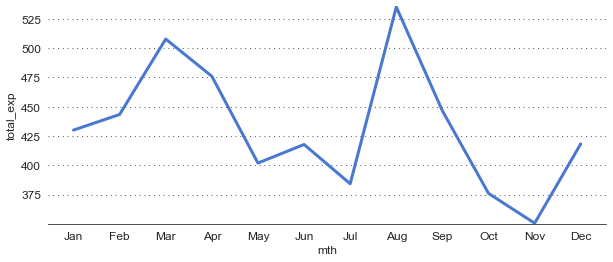

In [99]:
# median changes
df_chart = df.groupby('mth').agg({ 'stay_length': 'median',
                                   'accom_exp': 'median', 
                                   'shopping_exp': 'median', 
                                   'fnb_exp': 'median', 
                                   'transport_exp': 'median', 
                                   'medical_exp': 'median', 
                                   'other_exp': 'median', 
                                   'total_exp': 'median' })
# num changes
for col in df_chart.columns.values:
    fig, ax = plt.subplots(1, 1, figsize=(10, 4))

    for s in ['top', 'left', 'right']:
        ax.spines[s].set_visible(False)

    sns.lineplot(data=df_chart, x=df_chart.index, y=col, dashes=False, ax=ax,
                 linewidth=3, linestyle='solid')
    ax.grid(which = 'major', axis = 'y', zorder = 0, color = 'black', linestyle = ':', dashes = (1,5))
    ax.set_ylim(df_chart[col].min() - 0.5, df_chart[col].max() + 0.5)
    plt.show()

<a id = 'misc'></a>
## Misc

[back to top](#toc)

In [65]:
df.groupby('first_time_visit')['multi_dest'].value_counts(normalize=True)

first_time_visit  multi_dest
No                No            0.778246
                  Yes           0.221754
Yes               No            0.597598
                  Yes           0.402402
Name: multi_dest, dtype: float64

<a id = 'corr'></a>
## Correlations

Notes: 
- Encode: Age
- LE: gender, married, pov_grp, multi_dest, first_time_visit

[back to top](#toc)

In [66]:
# create copy for encoding
df_bins = df.copy(deep=True)

In [67]:
df_bins['arrival_method'].unique()

['Sea', 'Air', 'Land']
Categories (3, object): ['Sea', 'Air', 'Land']

In [68]:
# define variables to encode
dummy_cols = ['gender', 'married', 'pov_grp', 'multi_dest', 'first_time_visit', 'arrival_method']

# Encode categorical data
df_dummy = pd.get_dummies(df_bins[dummy_cols], drop_first = False)
df_dummy.columns = [s.lower() for s in df_dummy.columns]

In [69]:
df_dummy = df_dummy.drop(columns = ['married_no', 'gender_female', 
                                    'multi_dest_no', 'first_time_visit_no'])

In [70]:
df_dummy

gender_male  married_yes  pov_grp_bus  pov_grp_edu  pov_grp_hea  \
id                                                                       
4                1            1            0            0            0   
59               1            1            0            0            1   
83               1            1            1            0            0   
250              0            1            0            0            0   
260              0            1            0            0            1   
...            ...          ...          ...          ...          ...   
21924            1            1            0            0            0   
21925            1            0            0            0            0   
21960            1            1            0            0            0   
21961            0            0            0            0            0   
21962            1            1            0            0            0   

       pov_grp_lei  multi_dest_yes  first_time_visit_yes  arrival_method_air  \
id                                                                             
4                1               1                     0                   0   
59               0               0                     0                   1   
83               0               0                     0                   1   
250              1               1                     0                   0   
260              0               0                     0                   1   
...            ...             ...                   ...                 ...   
21924            1               0                     0                   1   
21925            1               1                     0                   1   
21960            1               1                     1                   1   
21961            1               0                     0                   1   
21962            1               0                     0                   1   

       arrival_method_land  arrival_method_sea  
id                                              
4                        0                   1  
59                       0                   0  
83                       0                   0  
250                      0                   1  
260                      0                   0  
...                    ...                 ...  
21924                    0                   0  
21925                    0                   0  
21960                    0                   0  
21961                    0                   0  
21962                    0                   0  

[2944 rows x 11 columns]

In [71]:
# clean up col names and concat with df_bin
df_dummy.columns = ['gender_m', 'married_b', 'pov_grp_bus', 'pov_grp_edu',
                    'pov_grp_hea', 'pov_grp_lei', 'multi_dest_b', 'first_time_b', 
                    'am_a', 'am_l', 'am_s']
binned = df_dummy.columns.tolist()

In [72]:
df_bins[binned] = df_dummy[binned]

In [73]:
# age_bin
df_bins['age_bin'] = LabelEncoder().fit_transform(df_bins['age'])

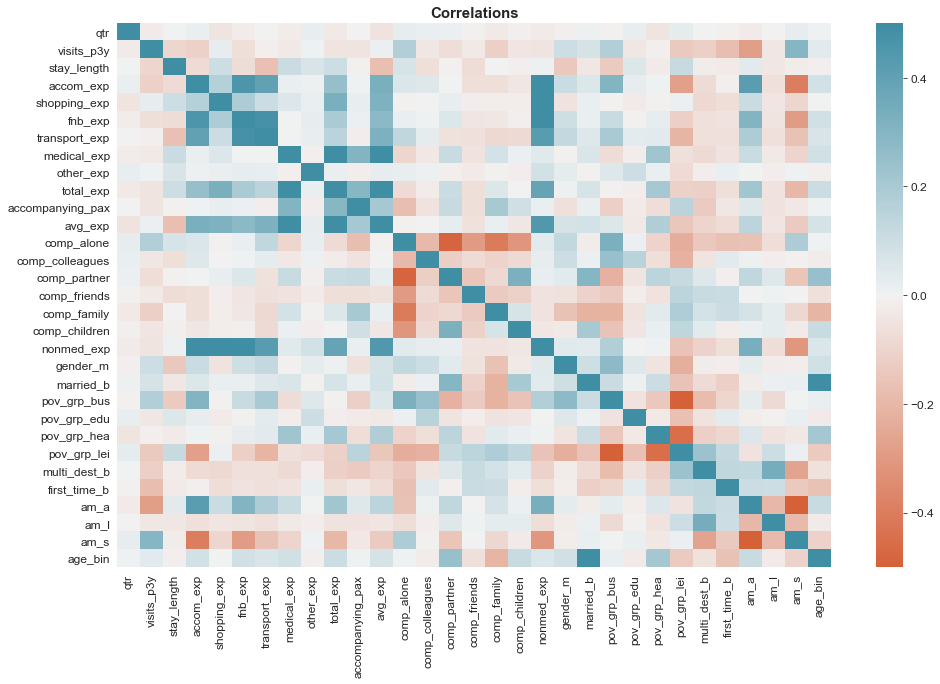

In [74]:
# General correlations
fig = plt.figure()
gs = fig.add_gridspec(1, 1)
ax0 = fig.add_subplot(gs[0, 0])

cmap1 = sns.diverging_palette(22, 219, s = 80, l = 55, as_cmap = True)

sns.heatmap(df_bins.corr(), 
            ax = ax0, vmin = -0.5, vmax = 0.5, 
            annot = False, square = False, 
            cbar = True, cmap = cmap1, 
            fmt = '.1g')
ax0.set_title('Correlations', fontsize = 15, fontweight = 'bold')

plt.show()

In [75]:
subset_stay = ['accom_exp', 'shopping_exp', 'fnb_exp', 'transport_exp', 'medical_exp', 
               'other_exp', 'total_exp', 'nonmed_exp', 'avg_exp', 'stay_length', 'married_b', 'gender_m', 
               'first_time_b', 'multi_dest_b']

exp = ['accom_exp', 'shopping_exp', 'fnb_exp', 'transport_exp', 'medical_exp', 
               'other_exp', 'total_exp', 'nonmed_exp', 'avg_exp']

subset_pov = ['accom_exp', 'shopping_exp', 'fnb_exp', 'transport_exp', 'medical_exp', 
              'other_exp', 'total_exp', 'nonmed_exp', 'avg_exp', 'pov_grp_bus', 'pov_grp_edu', 
              'pov_grp_hea', 'pov_grp_lei']

subset_comp = ['accom_exp', 'shopping_exp', 'fnb_exp', 'transport_exp', 'medical_exp', 
               'other_exp', 'total_exp', 'nonmed_exp', 'avg_exp', 'comp_alone', 
               'comp_colleagues', 'comp_partner', 'comp_friends', 'comp_family', 'comp_children']

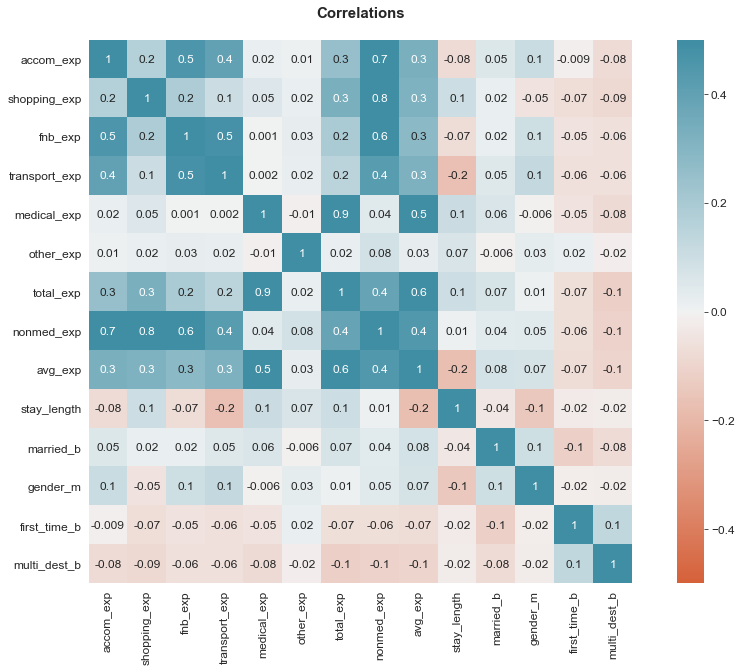

In [76]:
fig = plt.figure()
gs = fig.add_gridspec(1, 1)
ax0 = fig.add_subplot(gs[0, 0])

sns.heatmap(df_bins[subset_stay].corr(), 
            ax = ax0, vmin = -0.5, vmax = 0.5, 
            annot = True, square = True, 
            cbar = True, cmap = cmap1, 
            fmt = '.1g')
ax0.set_title('Correlations\n', fontsize = 15, fontweight = 'bold')
plt.show()

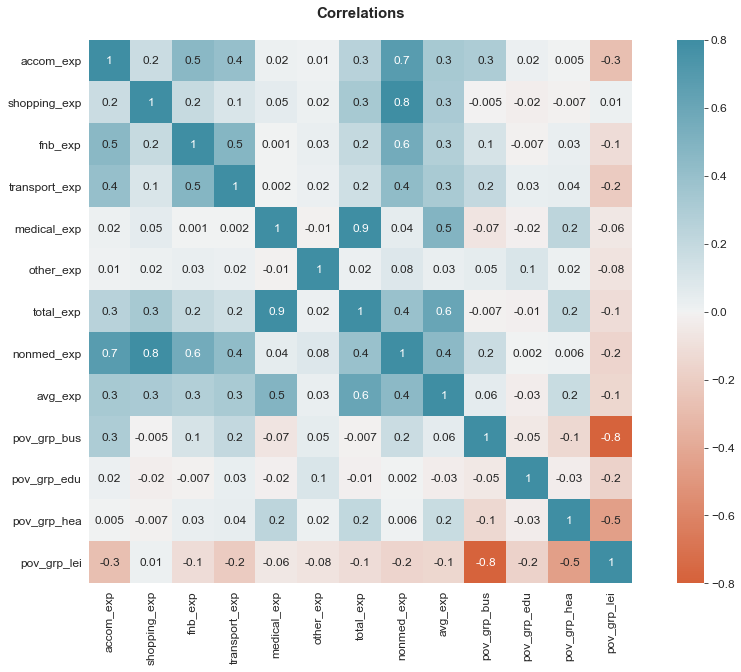

In [77]:
fig = plt.figure()
gs = fig.add_gridspec(1, 1)
ax0 = fig.add_subplot(gs[0, 0])

sns.heatmap(df_bins[subset_pov].corr(), 
            ax = ax0, vmin = -0.8, vmax = 0.8, 
            annot = True, square = True, 
            cbar = True, cmap = cmap1, 
            fmt = '.1g')
ax0.set_title('Correlations\n', fontsize = 15, fontweight = 'bold')
plt.show()

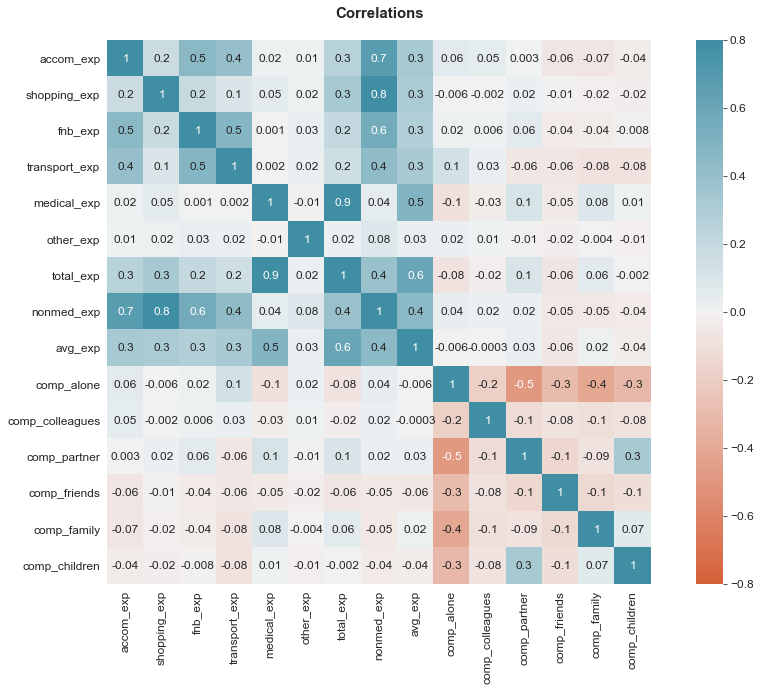

In [78]:
fig = plt.figure()
gs = fig.add_gridspec(1, 1)
ax0 = fig.add_subplot(gs[0, 0])

sns.heatmap(df_bins[subset_comp].corr(), 
            ax = ax0, vmin = -0.8, vmax = 0.8, 
            annot = True, square = True, 
            cbar = True, cmap = cmap1, 
            fmt = '.1g')
ax0.set_title('Correlations\n', fontsize = 15, fontweight = 'bold')
plt.show()

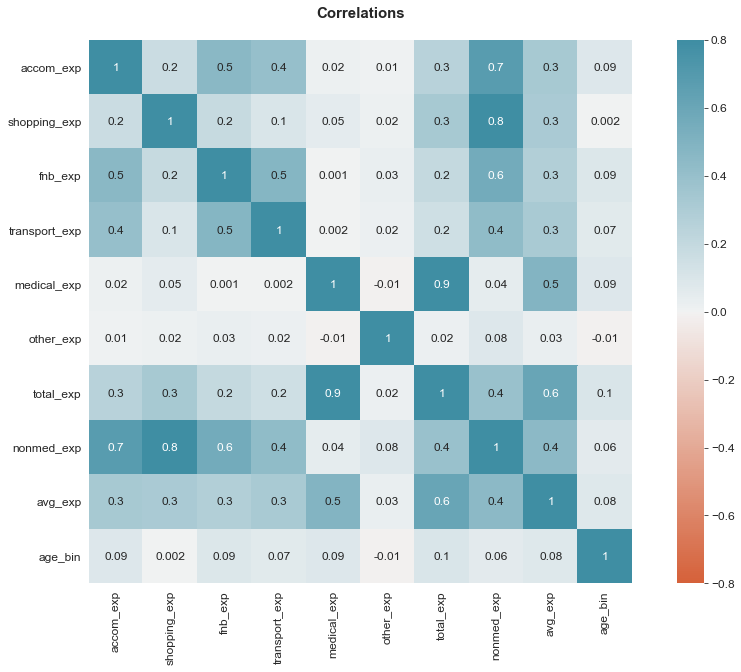

In [79]:
# expenses and age 
fig = plt.figure()
gs = fig.add_gridspec(1, 1)
ax0 = fig.add_subplot(gs[0, 0])

sns.heatmap(df_bins[exp + ['age_bin']].corr(), 
            ax = ax0, vmin = -0.8, vmax = 0.8, 
            annot = True, square = True, 
            cbar = True, cmap = cmap1, 
            fmt = '.1g')
ax0.set_title('Correlations\n', fontsize = 15, fontweight = 'bold')
plt.show()

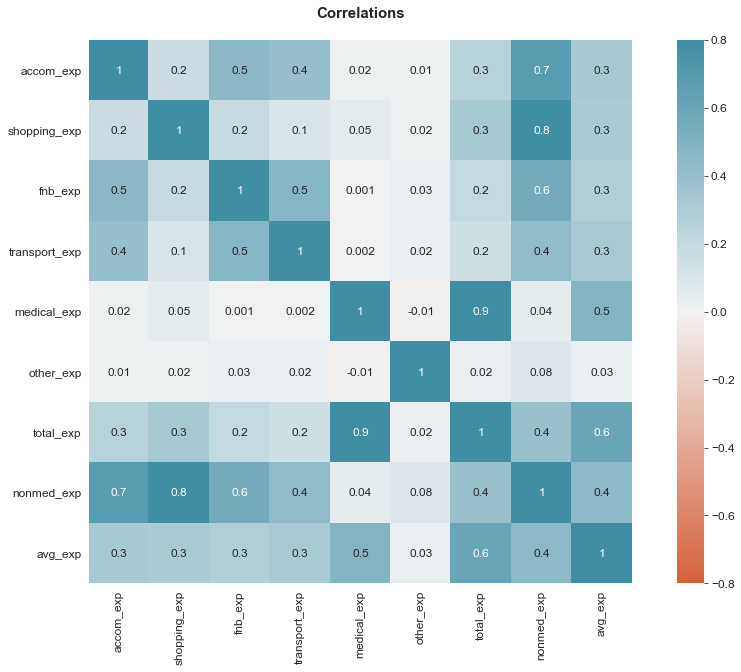

In [80]:
# expenses
fig = plt.figure()
gs = fig.add_gridspec(1, 1)
ax0 = fig.add_subplot(gs[0, 0])

sns.heatmap(df_bins[exp].corr(), 
            ax = ax0, vmin = -0.8, vmax = 0.8, 
            annot = True, square = True, 
            cbar = True, cmap = cmap1, 
            fmt = '.1g')
ax0.set_title('Correlations\n', fontsize = 15, fontweight = 'bold')
plt.show()